Data Loading

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv = 'Survey Data for Project INFO-502 2023.csv'
df = pd.read_csv(csv)

Data Preprocessing

In [96]:
#This is do display all of the columns
pd.set_option('display.max_columns', None)
df.head()

,Q1. Which country do you belong to? Please select from the list of countries given below.:,Q2. Which of the age groups best describe you?,Q3. Please indicate which of the following technologies best describes your knowledge/experience?,Q4. Please indicate which of the following technologies your organization has been involved with?,Q5. Please indicate which of the following job titles best describes your role?,Q6. How many years of knowledge/experience of blockchain technology (BCT) do you have?,Q7. How would you rate your knowledge of blockchain technology (BCT)?,Q8. What is/was the status of involvement of your organization with blockchain technology (BCT)?,Q9. What is/was the size of your organization in terms of the number of employees?,Q10. Which of the following industries describes your organization?,Q11. What type of blockchain technology (BCT) you have knowledge/experience of?,Q12. What is the highest level of your education?,Q13. What is your gender?,"Q.1.(a) - In my opinion, organizations adopt blockchain when they perceive that blockchain reduces overhead expenses.","Q.1.(b) - In my opinion, organizations adopt blockchain when they perceive that blockchain reduces data error rates.","Q.1.(c) - In my opinion, organizations adopt blockchain when they perceive that blockchain reduces transaction costs while transferring funds.","Q.1.(d) - In my opinion, organizations adopt blockchain when they perceive that blockchain saves time while accomplishing business tasks.","Q.1.(e) - In my opinion, organizations adopt blockchain when they perceive that blockchain increases the organization’s overall productivity.","Q.2.(a) - In my opinion, organizations adopt blockchain when they perceive that blockchain fits well with their business processes.","Q.2.(b) - In my opinion, organizations adopt blockchain when they perceive that blockchain is compatible with their technological infrastructure.","Q.2.(c) - In my opinion, organizations adopt blockchain when they perceive that blockchain fits well with their technological skills.","Q.3.(a) - In my opinion, organizations do not adopt blockchain when they perceive that blockchain requires extra technical skills to use.","Q.3.(b) - In my opinion, organizations do not adopt blockchain when they perceive that blockchain is difficult to understand from a business perspective.","Q.3.(c) - In my opinion, organizations do not adopt blockchain when they perceive that blockchain is conceptually difficult to understand from a technical perspective.","Q.4.(a) - In my opinion, organizations adopt blockchain when they perceive that blockchain enables them to have transparent access to information across the network.","Q.4.(b) - In my opinion, organizations adopt blockchain when they perceive that blockchain enables them to have a transparent view of any activity in the data.","Q.4.(c) - In my opinion, organizations adopt blockchain when they perceive that blockchain enables them to have a transparent flow of the entire data.","Q.5.(a) - In my opinion, organizations adopt blockchain when they perceive that blockchain enables them to store their data without the involvement of any intermediary.","Q.5.(b) - In my opinion, organizations adopt blockchain when they perceive that blockchain enables them to access their data without the involvement of any intermediary.","Q.5.(c) - In my opinion, organizations adopt blockchain when they perceive that blockchain enables them to share their data without the involvement of any intermediary.","Q.5.(d) - In my opinion, organizations adopt blockchain when they perceive that blockchain enables them to audit without the involvement of any intermediary.","Q.6.(a) - In my opinion, organization do not adopt blockchain when they perceive that blockchain technology has not reached at its technological maturity level.","Q.6.(b) - In my opinion, organizations do not adopt blockchain technology when they are not sure about its scalability with the expansion of the organ

In [97]:
#Shorten the column names to just the question number as oppossed to the full question for streamlined analysis and visualizations
# Function to modify column names based on position
def modify_column_name(col):
    if col.startswith('Q') and '.' in col:
        # Split by '.' for columns starting with 'Q.' (e.g., Q.1.(a))
        return col.split(' ')[0]
    else:
        # Split by space for other columns
        return col.split('.')[0]
# Apply the function to each column name
df.columns = df.columns.map(modify_column_name)
# Display the updated DataFrame to show the new column names
df.head()

,Q1,Q2.,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q.1.(a),Q.1.(b),Q.1.(c),Q.1.(d),Q.1.(e),Q.2.(a),Q.2.(b),Q.2.(c),Q.3.(a),Q.3.(b),Q.3.(c),Q.4.(a),Q.4.(b),Q.4.(c),Q.5.(a),Q.5.(b),Q.5.(c),Q.5.(d),Q.6.(a),Q.6.(b),Q.6.(c),Q.6.(d),Q.6.(e),Q.7.(a),Q.7.(b),Q.7.(c),Q.8.(a),Q.8.(b),Q.8.(c),Q.9.(a),Q.9.(b),Q.9.(c),Q.9.(d),Q.9.(e),Q.9.(f),Q.9.(g),Q.10.(a),Q.10.(b),Q.10.(c),Q.11.(a),Q.11.(b),Q.11.(c),Q.12.(a),Q.12.(b),Q.12.(c),Q.13.(a),Q.13.(b),Q.13.(c),Q.13.(d),Q.14.(a),Q.14.(b),Q.14.(c),Q.15.(a),Q.15.(b),Q.15.(c)
0,United States of America,31-40 Years,Distributed DBMS,Artificial Intelligence,Other,3–4 years,Little knowledge of blockchain technology,Currently implemented blockchain technology,Having employees between 20 and 199,Education,Hybrid,Graduate Degree,Female,Agree,Somewhat Agree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral (Neither agree nor disagree),Strongly Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Agree,Neutral (Neither agree nor disagree),Strongly Agree,Strongly Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Somewhat Disagree,Somewhat Agree,Agree,Disagree,Somewhat Disagree,Somewhat Agree,NaN,Strongly Agree,Strongly Agree,Somewhat Agree,Agree,Somewhat Disagree,Agree
1,United States of America,31-40 Years,Blockchain Technology (BCT),Internet of Things (IoT),Business Development Manager,8 or more years,Good knowledge of blockchain technology,Currently interested in blockchain technology ...,Having employees more than 200,Manufacturing,Public,Professional Certificate/Diploma,Male,Agree,Somewhat Agree,Somewhat Agree,Somewhat Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Somewhat Agree,Agree,Agree,NaN,Strongly Agree,Disagree,Disagree,Somewhat Disagree,Somewhat Disagree,Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Agree,Agree,Strongly Agree,Strongly Agree,NaN,Agree,Somewhat Agree,Somewhat Agree,Agree,NaN,Agree,Agree,NaN,Strongly Agree,NaN,Strongly Agree,Agree,NaN,Somewhat Agree,NaN,Strongly Agree,NaN,Agree,NaN,Agree,NaN,Agree,NaN,Agree,NaN,Strongly Agree,Somewhat Agree,Strongly Agree,Strongly Agree
2,United States of America,41-50 Years,Blockchain Technology (BCT),Artificial Intelligence,IT Director,5–7 years,Good knowledge of blockchain technology,Currently in the process of deciding adoption ...,Having employees between 5 and 19,Information Technology,Private,Postgraduate Degree or Higher,Male,Strongly Disagree,Disagree,Somewhat Disagree,Strongly Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Neutral (Neither agree nor disagree),Somewhat Disagree,Somewhat Disagree,Strongly Disagree,Somewhat Disagree,Neutral (Neither agree nor disagree),Somewhat Disagree,Somewhat Disagree,Neutral (Neither agree nor disagree),Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Agree,Disagree,Neutral (Neither agree nor disagree),Agree,Agree,Somewhat Agree,Neutral (Neither agree nor disagree),Somewhat Disagree,Somewhat Disagree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree
3,United States of America,51-60 Years,Blockchain Technology (BCT),Blockchain Technology,"Chief Technology Officer, Chief Information Of...",5–7 years,Good knowledge of blockchain technology,Currently implemented blo

Below is the missing value handling. We perform a brief analysis on the data to uncover the nature of the null values in the data. First we see how many nulls are in each column and subseqeuntly which participants have at least one null value. This process gives insight into the null values in the data. Due to the categorical nature of the data and the null values being rather spread out, we employ a method of filling the nulls with the mode for the multiple choice questions pertaining to BCT. This excludes questions 8 and 9 which have nulls however pertain to questions relating to the participant themselves which renders using mode to fill less suitable due to the more expanisve variety of response possibility.

In [98]:
#Shows the number of nulls in each column
X = df.isnull()
count = 0
test = {}
for i in X:
    for index in X[i]:
        if index == True:
            count = count + 1
        else:
            continue
    test[i]=count
    count = 0
print(test)

{'  Q1': 0, 'Q2.': 0, '  Q3': 0, ' Q4': 0, '  Q5': 0, '  Q6': 0, '  Q7': 0, '  Q8': 3, '  Q9': 2, '  Q10': 0, '  Q11': 0, '  Q12': 0, '  Q13': 0, 'Q.1.(a)': 0, 'Q.1.(b)': 0, 'Q.1.(c)': 0, 'Q.1.(d)': 0, 'Q.1.(e)': 1, 'Q.2.(a)': 4, 'Q.2.(b)': 1, 'Q.2.(c)': 0, 'Q.3.(a)': 0, 'Q.3.(b)': 1, 'Q.3.(c)': 0, 'Q.4.(a)': 2, 'Q.4.(b)': 3, 'Q.4.(c)': 0, 'Q.5.(a)': 2, 'Q.5.(b)': 2, 'Q.5.(c)': 1, 'Q.5.(d)': 1, 'Q.6.(a)': 2, 'Q.6.(b)': 1, 'Q.6.(c)': 1, 'Q.6.(d)': 0, 'Q.6.(e)': 0, 'Q.7.(a)': 0, 'Q.7.(b)': 1, 'Q.7.(c)': 5, 'Q.8.(a)': 2, 'Q.8.(b)': 0, 'Q.8.(c)': 0, 'Q.9.(a)': 0, 'Q.9.(b)': 2, 'Q.9.(c)': 0, 'Q.9.(d)': 0, 'Q.9.(e)': 2, 'Q.9.(f)': 1, 'Q.9.(g)': 2, 'Q.10.(a)': 4, 'Q.10.(b)': 3, 'Q.10.(c)': 1, 'Q.11.(a)': 0, 'Q.11.(b)': 2, 'Q.11.(c)': 2, 'Q.12.(a)': 2, 'Q.12.(b)': 1, 'Q.12.(c)': 1, 'Q.13.(a)': 0, 'Q.13.(b)': 2, 'Q.13.(c)': 2, 'Q.13.(d)': 3, 'Q.14.(a)': 1, 'Q.14.(b)': 2, 'Q.14.(c)': 1, 'Q.15.(a)': 0, 'Q.15.(b)': 2, 'Q.15.(c)': 0}


In [99]:
#Shows which participants in the data had at least one null value in their responses
Null_Row = df.isnull().any(axis=1)
rows_with_null = {}
row=0
for i in Null_Row:
    if i == True:
        rows_with_null[row]='Has Null'
    row = row + 1
rows_with_null

{0: 'Has Null',
 1: 'Has Null',
 6: 'Has Null',
 10: 'Has Null',
 14: 'Has Null',
 17: 'Has Null',
 25: 'Has Null',
 32: 'Has Null',
 33: 'Has Null',
 36: 'Has Null',
 37: 'Has Null',
 41: 'Has Null',
 42: 'Has Null',
 43: 'Has Null',
 44: 'Has Null',
 45: 'Has Null',
 47: 'Has Null',
 54: 'Has Null',
 55: 'Has Null',
 56: 'Has Null',
 57: 'Has Null',
 59: 'Has Null',
 61: 'Has Null',
 63: 'Has Null',
 67: 'Has Null',
 71: 'Has Null',
 75: 'Has Null',
 81: 'Has Null',
 94: 'Has Null',
 98: 'Has Null',
 101: 'Has Null',
 105: 'Has Null',
 106: 'Has Null',
 107: 'Has Null'}

In [100]:
#This replaces each null with the mode from the question it 
for col in df.columns:
    mode_val = df[col].mode()[0]  # Calculate the mode for the column
    df[col].fillna(mode_val, inplace=True)  # Fill null values with the mode

When viewing the dataset, we noticed that the particpant from Andorra has responses which seem unreliable. This respondent answers that they are under 18 while being a CEO. Along with this, they strongly disagree with most of the BCT questions. As a result we opted to drop this participant to ensure the reliablility of the sourced data

In [101]:
#This finds the row index corresponding to the Andorra participant
count = 0
Andorra_Row = []
for i in df[df.columns[0]]:
    if i == 'Andorra':
        Andorra_Row = count
    count = count + 1
Andorra_Row

86

In [102]:
#This drops this participant from the dataframe
df.drop(86, inplace = True)

Exploratory Data Analysis

In [103]:
#Show Unique Repsonses for each Question
for i in df:
    Unique_Responses = df[i].unique()
    print(Unique_Responses)
    Unique_responses = None

['United States of America' 'United Kingdom' 'United Arab Emirates'
 'Japan' 'Australia' 'Canada' 'Germany' 'India']
['31-40 Years' '41-50 Years' '51-60 Years' '>60 Years' '18-30 Years']
['Distributed DBMS' 'Blockchain Technology (BCT)'
 'Electronic Data Interchange (EDI)' 'Research' 'Research ' 'B2B-Commerce'
 'Research and Development' 'R&D'
 'ERP ; Banking and Financial Application ; Contact center ;'
 'Mobile apps' 'RPA']
['Artificial Intelligence' 'Internet of Things (IoT)'
 'Blockchain Technology' 'Electronic Data Interchange (EDI)'
 'Cloud Computing' 'Robotics' 'Social Media Technologies' 'Gaming'
 'B2B-Commerce' 'Distributed DBMS' 'Other']
['Other' 'Business Development Manager' 'IT Director'
 'Chief Technology Officer, Chief Information Officer, Chief Digital Officer'
 'Finance Director, Finance Manager' 'Database Administrator'
 'Customer Service Manager' 'IT Manager' 'Technology Strategy Manager'
 'Supply Chain Manager' 'Chief Executive Officer, President, Chairperson'
 'Sal

{'United States of America': 90, 'United Kingdom': 7, 'United Arab Emirates': 2, 'Japan': 1, 'Australia': 1, 'Canada': 2, 'Germany': 1, 'India': 4}


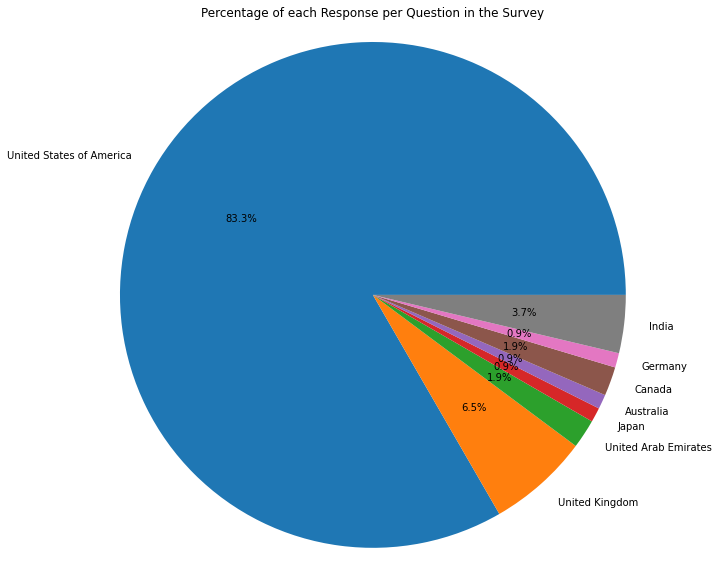

None
{'31-40 Years': 19, '41-50 Years': 39, '51-60 Years': 22, '>60 Years': 9, '18-30 Years': 19}


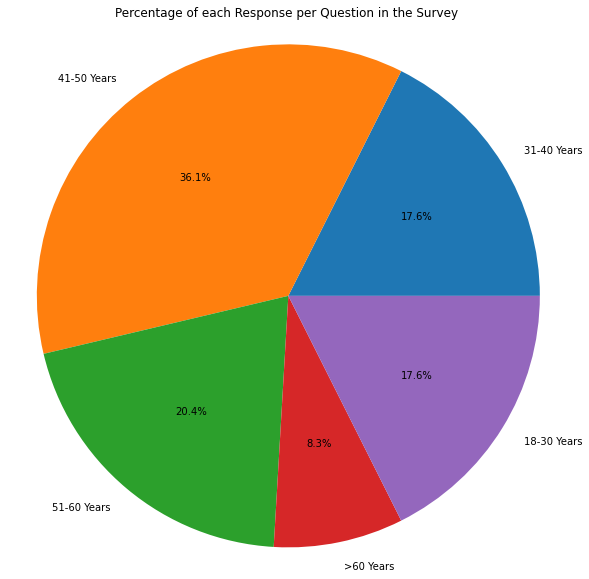

None
{'Distributed DBMS': 20, 'Blockchain Technology (BCT)': 38, 'Electronic Data Interchange (EDI)': 24, 'Research': 4, 'Research ': 2, 'B2B-Commerce': 12, 'Research and Development': 1, 'R&D': 4, 'ERP ; Banking and Financial Application ; Contact center ;': 1, 'Mobile apps': 1, 'RPA': 1}


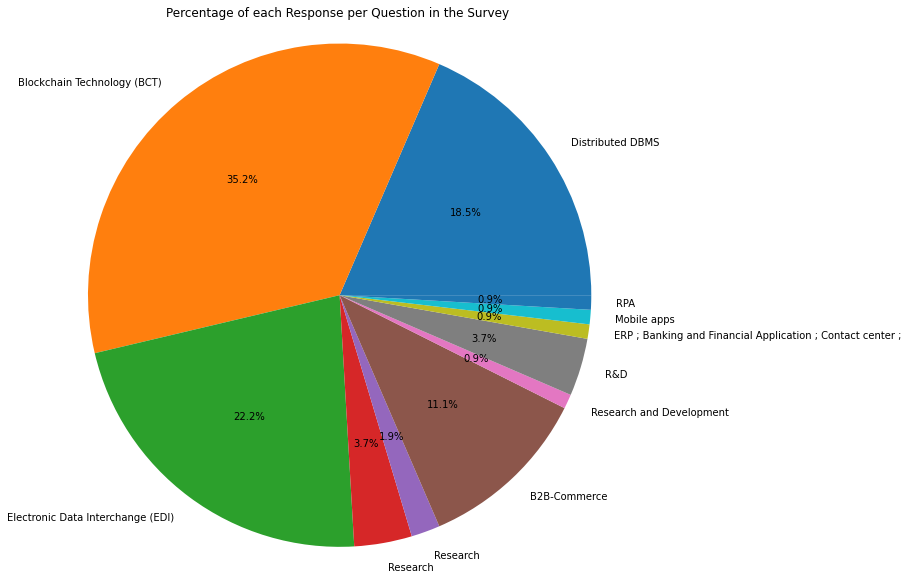

None
{'Artificial Intelligence': 18, 'Internet of Things (IoT)': 7, 'Blockchain Technology': 36, 'Electronic Data Interchange (EDI)': 12, 'Cloud Computing': 9, 'Robotics': 2, 'Social Media Technologies': 2, 'Gaming': 5, 'B2B-Commerce': 9, 'Distributed DBMS': 7, 'Other': 1}


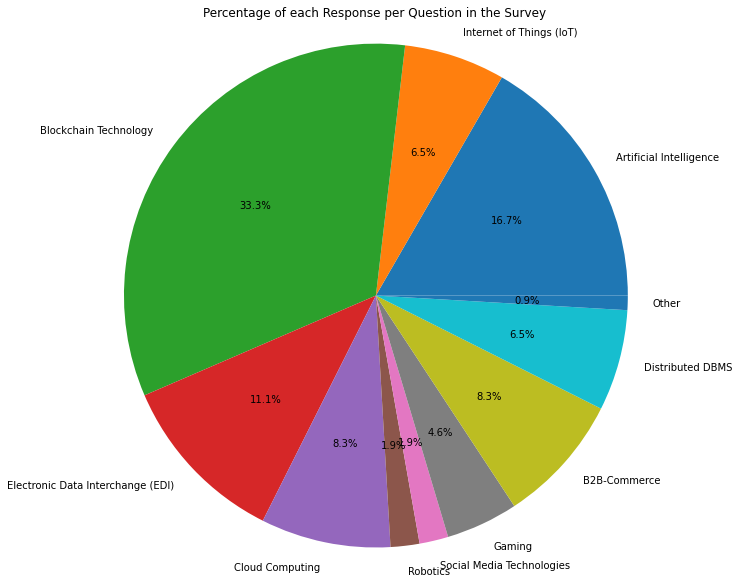

None
{'Other': 10, 'Business Development Manager': 10, 'IT Director': 14, 'Chief Technology Officer, Chief Information Officer, Chief Digital Officer': 13, 'Finance Director, Finance Manager': 11, 'Database Administrator': 7, 'Customer Service Manager': 9, 'IT Manager': 12, 'Technology Strategy Manager': 7, 'Supply Chain Manager': 4, 'Chief Executive Officer, President, Chairperson': 8, 'Sales Manager': 2, 'Chief Executive Officer President Chairperson': 1}


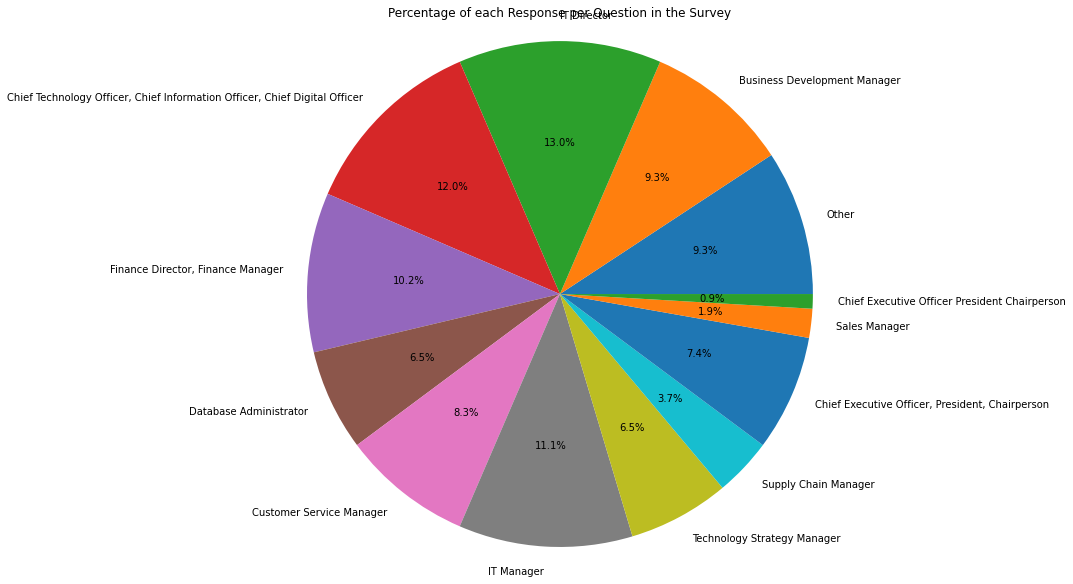

None
{'3–4 years': 35, '8 or more years': 19, '5–7 years': 44, 'Less than 3 years': 8, 'No Experinece': 2}


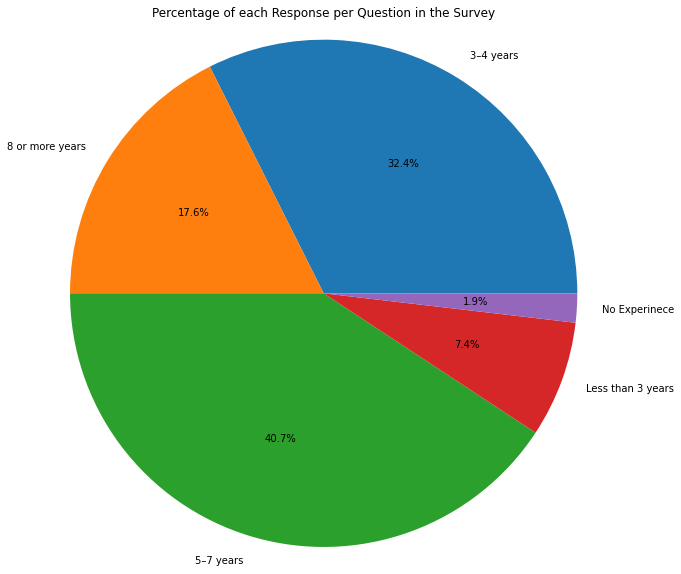

None
{'Little knowledge of blockchain technology': 26, 'Good knowledge of blockchain technology': 54, 'Excellent knowledge of blockchain technology': 28}


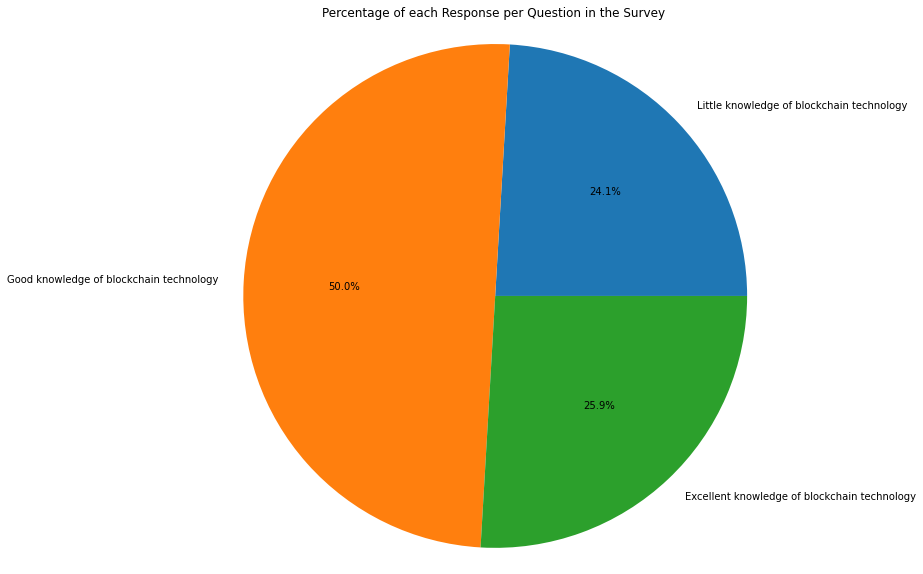

None
{'Currently implemented blockchain technology': 50, 'Currently interested in blockchain technology and actively seeking related information': 22, 'Currently in the process of deciding adoption of blockchain technology': 26, 'Previously implemented blockchain technology, but currently not using': 9, 'Currently interested in blockchain technology and actively seeking related informa\x02tion': 1}


C:\Users\dcers\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dcers\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


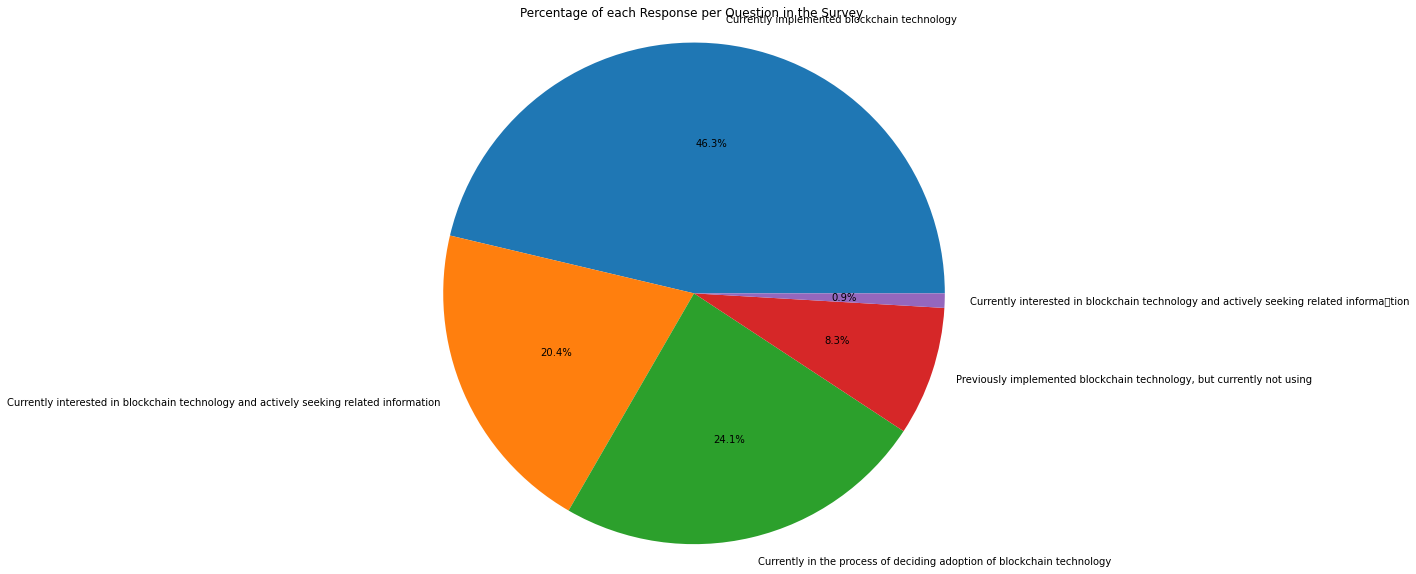

None
{'Having employees between 20 and 199': 31, 'Having employees more than 200': 40, 'Having employees between 5 and 19': 23, 'Having employees between 1 and 4': 14}


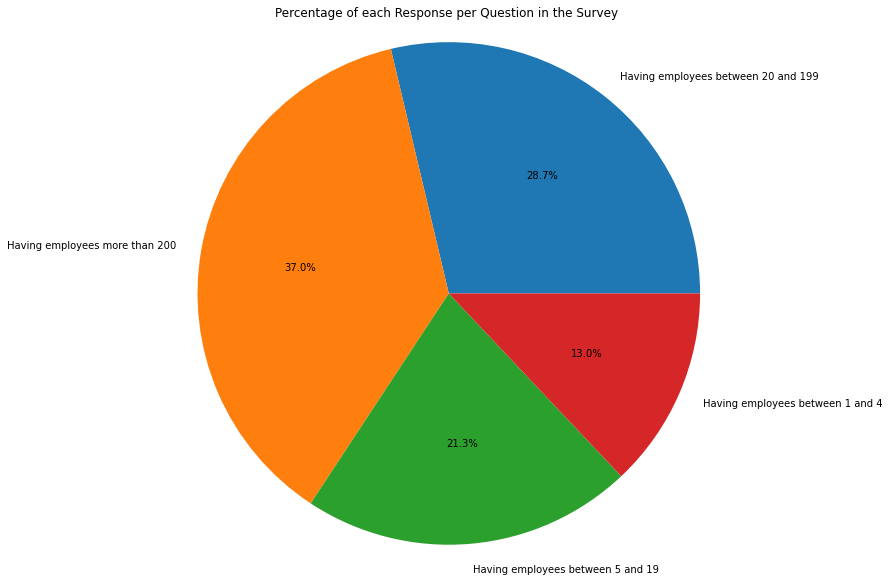

None
{'Education': 9, 'Manufacturing': 9, 'Information Technology': 20, 'Finance/Banking': 17, 'Insurance': 11, 'Other': 4, 'Consultancy': 6, 'Chemical': 2, 'Automotive': 4, 'Electronics': 2, 'Services': 4, 'Construction': 4, 'Pharmaceutical': 3, 'Telecommunication': 2, 'Supply Chain': 4, 'Government': 1, 'Retail': 3, 'Legal': 3}


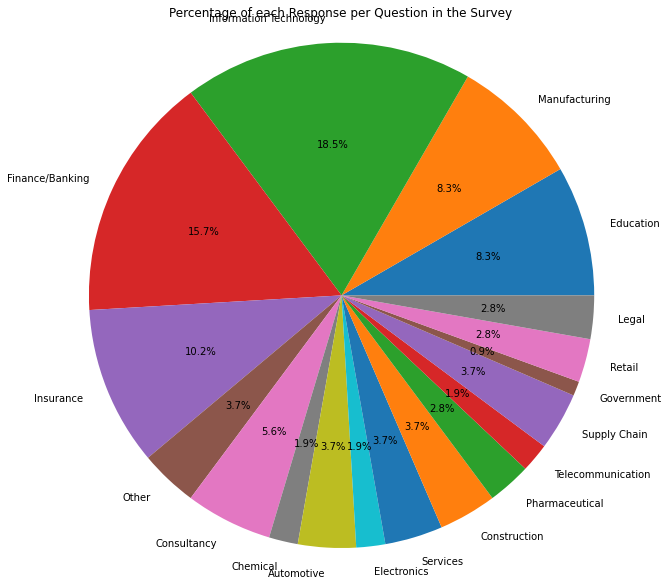

None
{'Hybrid': 38, 'Public': 37, 'Private': 30, 'Exactly ': 1, 'all': 1, 'Neither': 1}


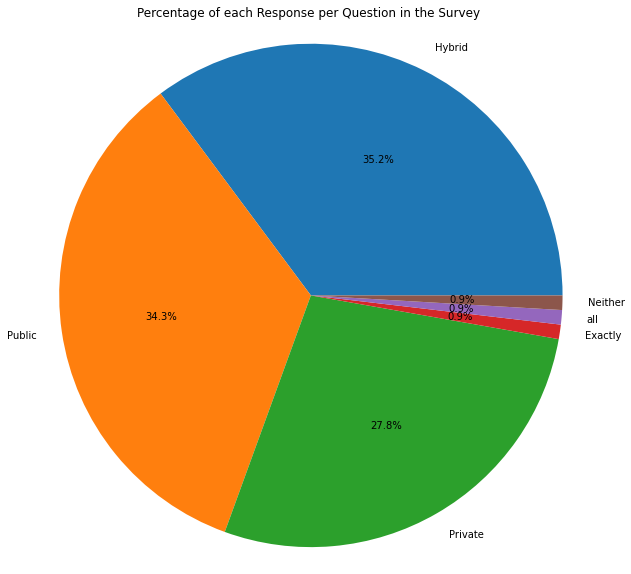

None
{'Graduate Degree': 28, 'Professional Certificate/Diploma': 22, 'Postgraduate Degree or Higher': 38, 'Undergraduate Degree': 15, 'College Certificate': 1, 'Other': 4}


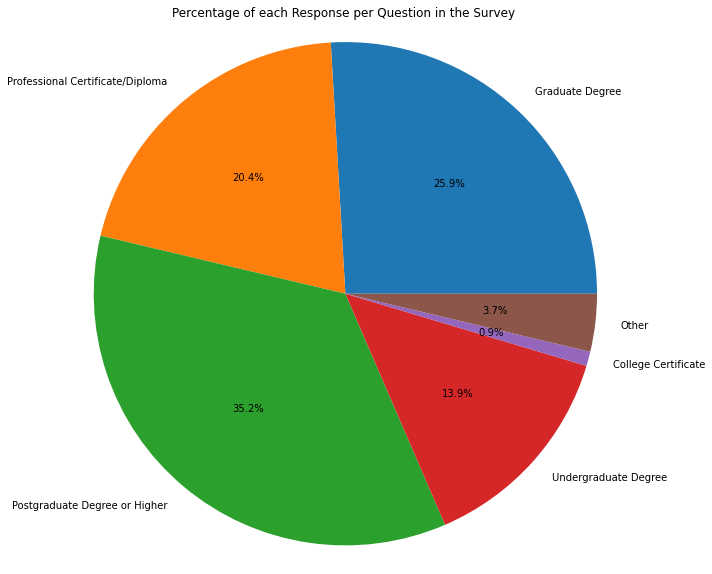

None
{'Female': 35, 'Male': 69, 'Not Specified': 4}


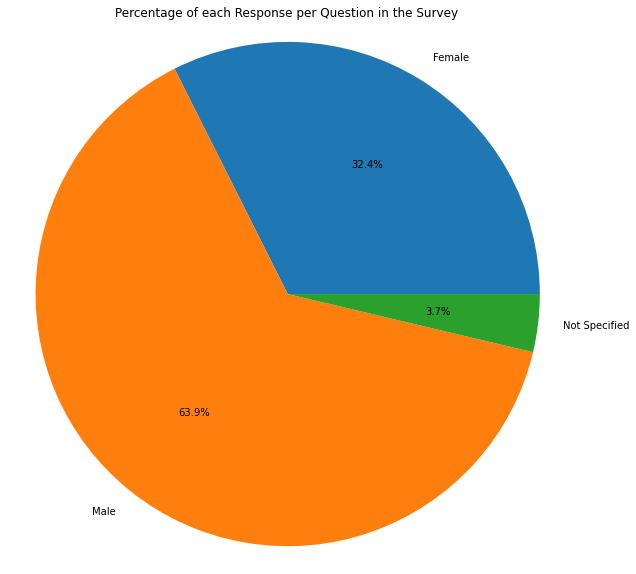

None
{'Agree': 23, 'Strongly Disagree': 4, 'Somewhat Agree': 31, 'Neutral (Neither agree nor disagree)': 23, 'Somewhat Disagree': 9, 'Disagree': 6, 'Strongly Agree': 12}


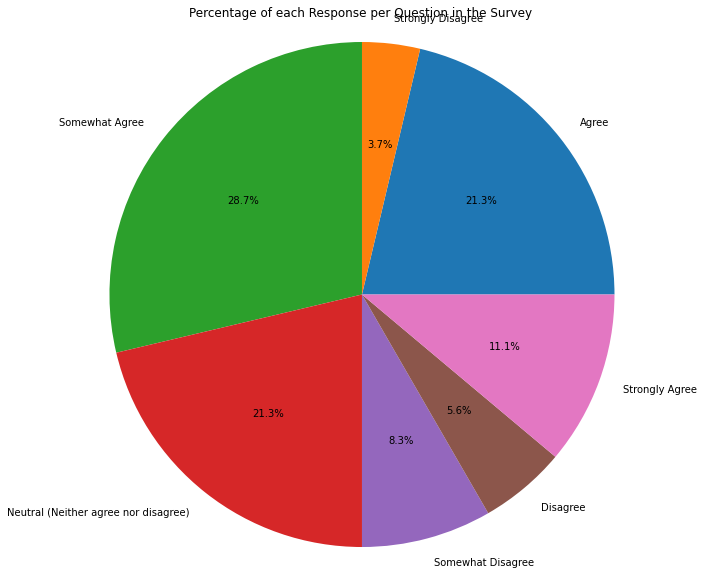

None
{'Somewhat Agree': 26, 'Disagree': 7, 'Somewhat Disagree': 13, 'Agree': 29, 'Neutral (Neither agree nor disagree)': 15, 'Strongly Agree': 15, 'Strongly Disagree': 3}


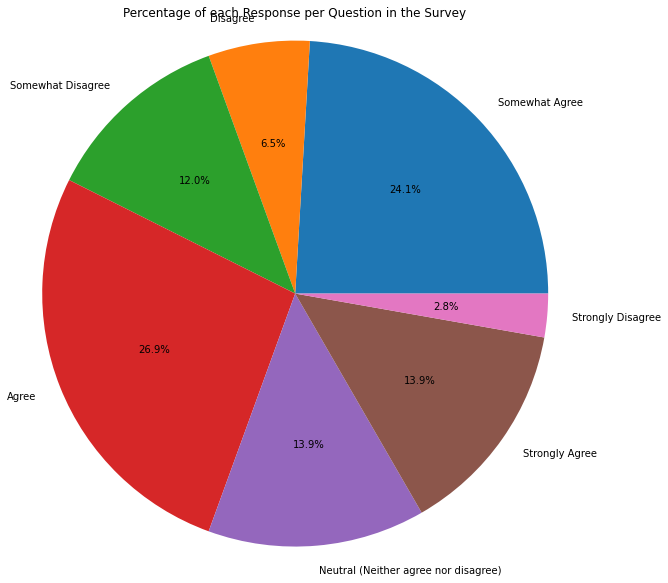

None
{'Strongly Agree': 22, 'Somewhat Agree': 27, 'Somewhat Disagree': 8, 'Agree': 24, 'Disagree': 6, 'Neutral (Neither agree nor disagree)': 18, 'Strongly Disagree': 3}


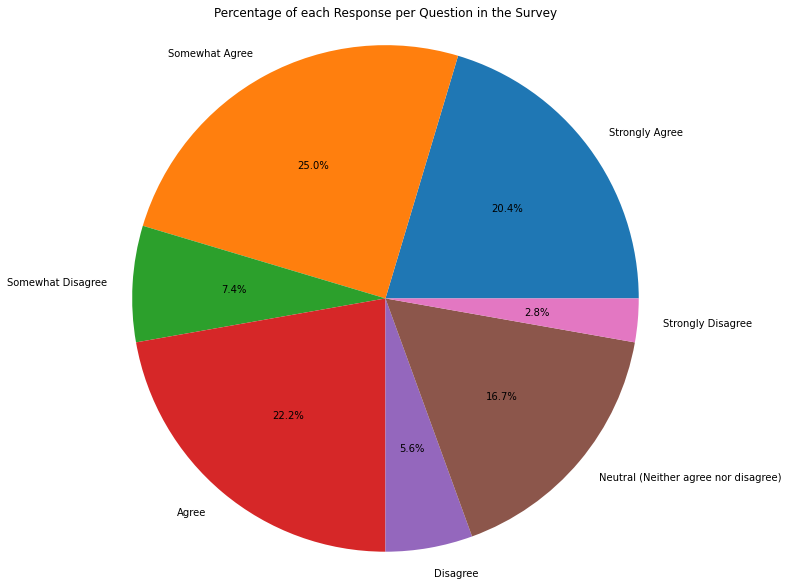

None
{'Disagree': 3, 'Somewhat Agree': 24, 'Strongly Disagree': 5, 'Agree': 30, 'Somewhat Disagree': 10, 'Neutral (Neither agree nor disagree)': 22, 'Strongly Agree': 14}


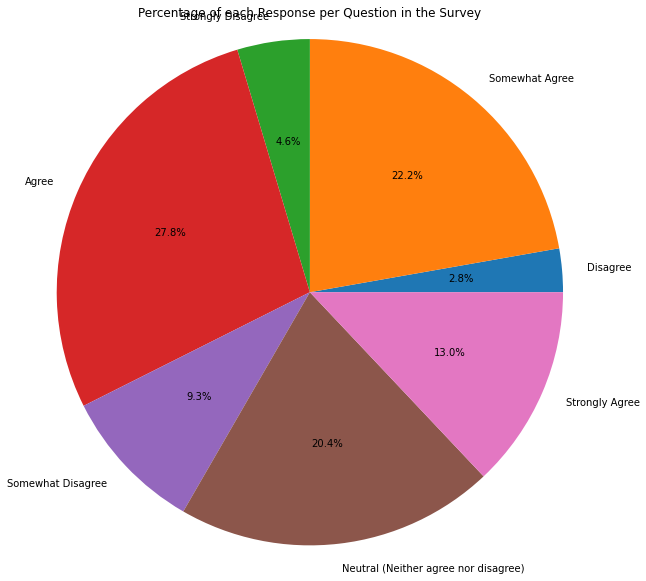

None
{'Strongly Agree': 19, 'Somewhat Agree': 33, 'Strongly Disagree': 4, 'Agree': 28, 'Neutral (Neither agree nor disagree)': 11, 'Somewhat Disagree': 12, 'Disagree': 1}


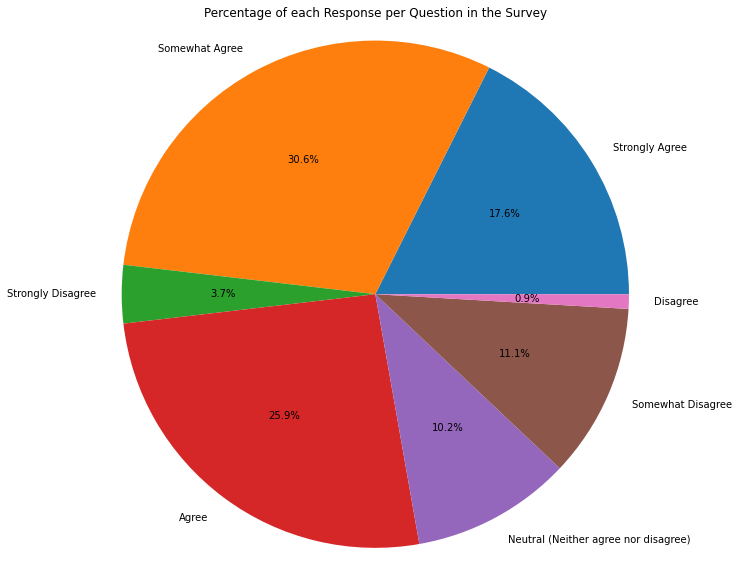

None
{'Strongly Agree': 16, 'Somewhat Disagree': 12, 'Somewhat Agree': 23, 'Neutral (Neither agree nor disagree)': 16, 'Agree': 35, 'Disagree': 4, 'Strongly Disagree': 2}


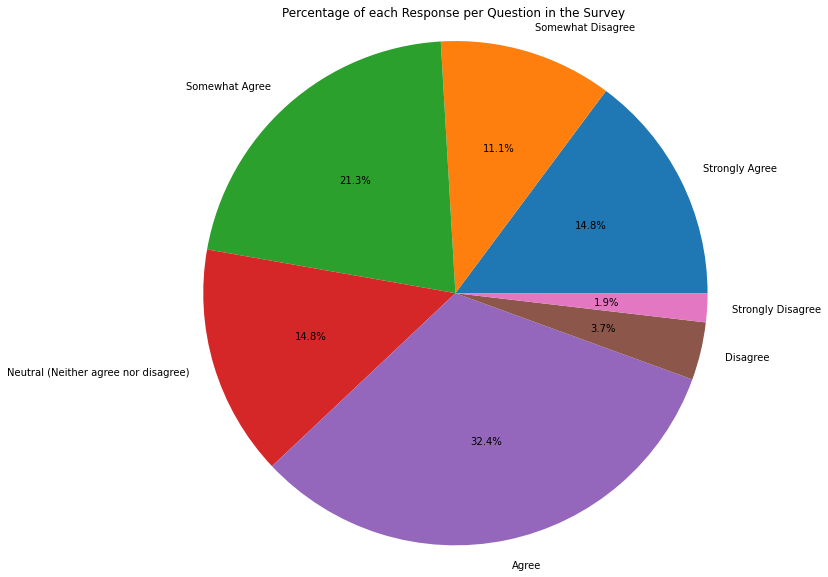

None
{'Strongly Agree': 13, 'Somewhat Disagree': 14, 'Somewhat Agree': 28, 'Neutral (Neither agree nor disagree)': 20, 'Disagree': 2, 'Agree': 30, 'Strongly Disagree': 1}


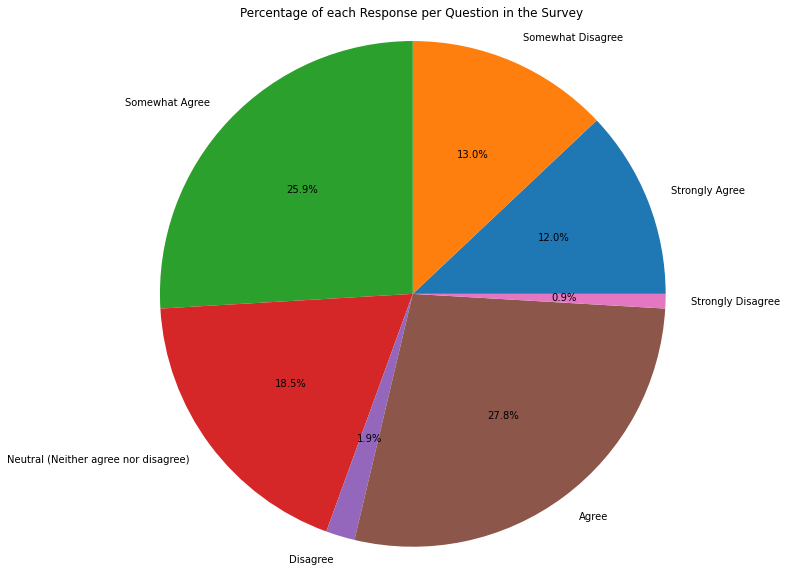

None
{'Strongly Agree': 16, 'Neutral (Neither agree nor disagree)': 19, 'Somewhat Disagree': 8, 'Agree': 31, 'Somewhat Agree': 29, 'Disagree': 2, 'Strongly Disagree': 3}


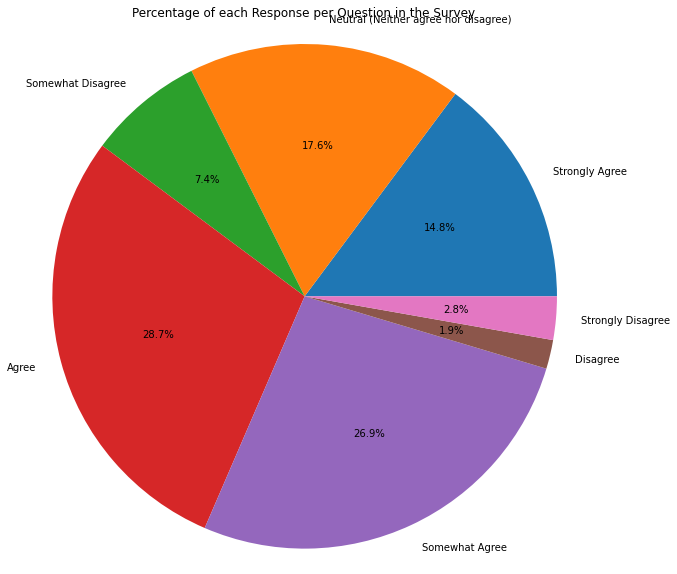

None
{'Somewhat Agree': 37, 'Neutral (Neither agree nor disagree)': 18, 'Agree': 24, 'Somewhat Disagree': 12, 'Strongly Agree': 10, 'Disagree': 2, 'Strongly Disagree': 5}


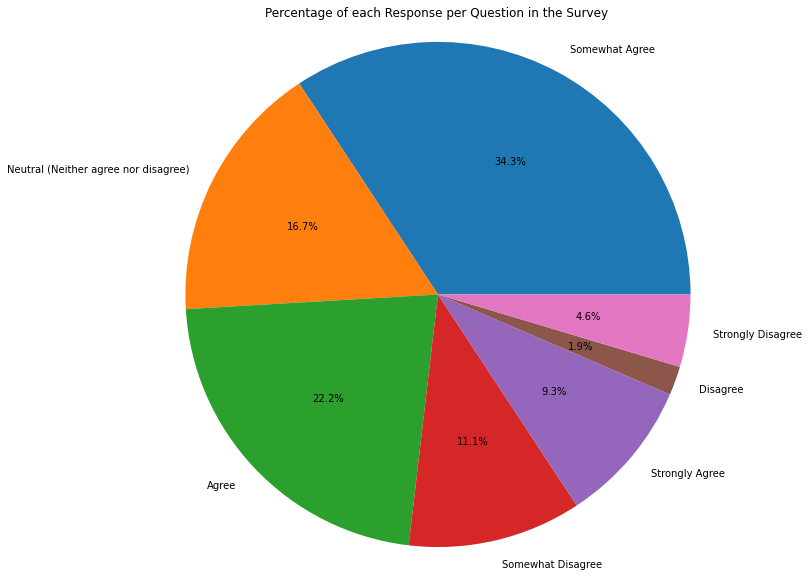

None
{'Agree': 38, 'Somewhat Agree': 29, 'Somewhat Disagree': 12, 'Strongly Agree': 13, 'Disagree': 5, 'Neutral (Neither agree nor disagree)': 10, 'Strongly Disagree': 1}


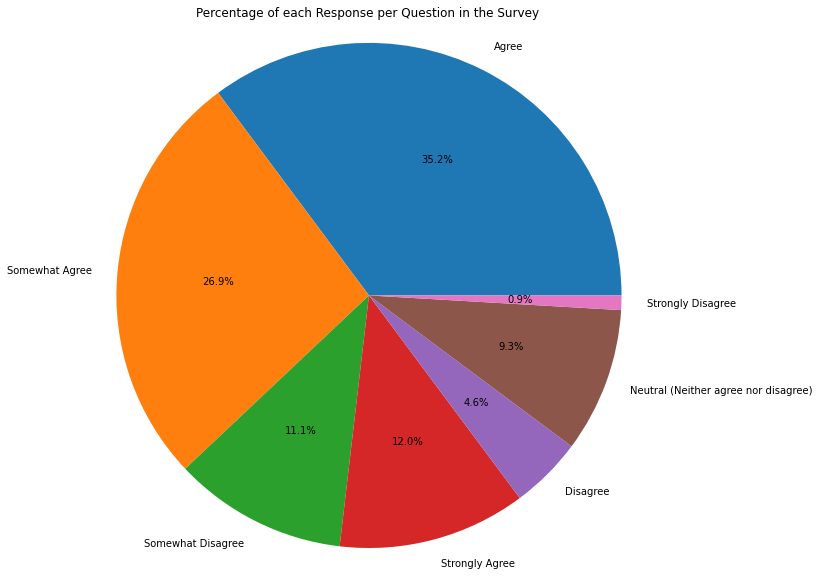

None
{'Strongly Agree': 12, 'Agree': 31, 'Somewhat Disagree': 10, 'Somewhat Agree': 35, 'Neutral (Neither agree nor disagree)': 12, 'Disagree': 6, 'Strongly Disagree': 2}


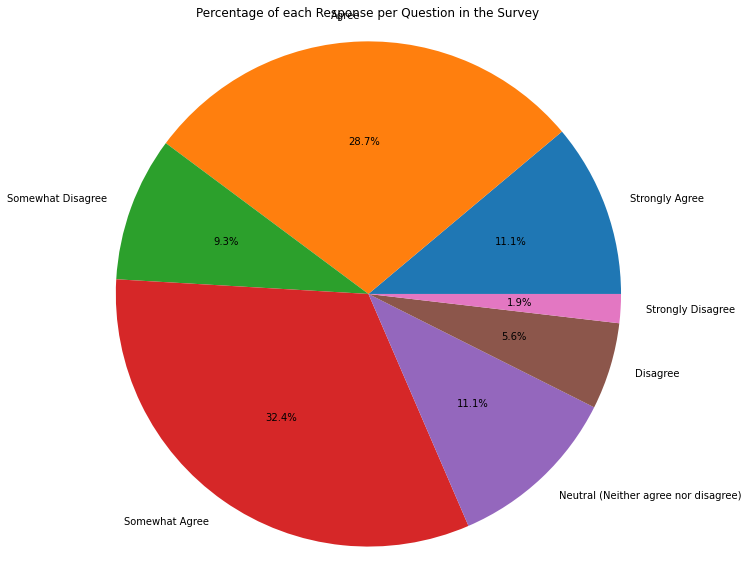

None
{'Strongly Agree': 18, 'Agree': 31, 'Strongly Disagree': 4, 'Somewhat Disagree': 9, 'Neutral (Neither agree nor disagree)': 16, 'Somewhat Agree': 25, 'Disagree': 5}


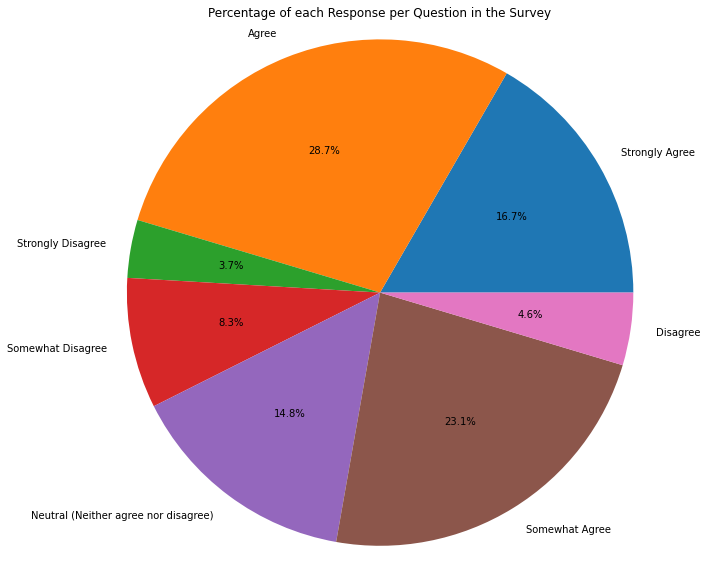

None
{'Strongly Agree': 16, 'Agree': 36, 'Somewhat Disagree': 7, 'Somewhat Agree': 30, 'Neutral (Neither agree nor disagree)': 11, 'Disagree': 7, 'Strongly Disagree': 1}


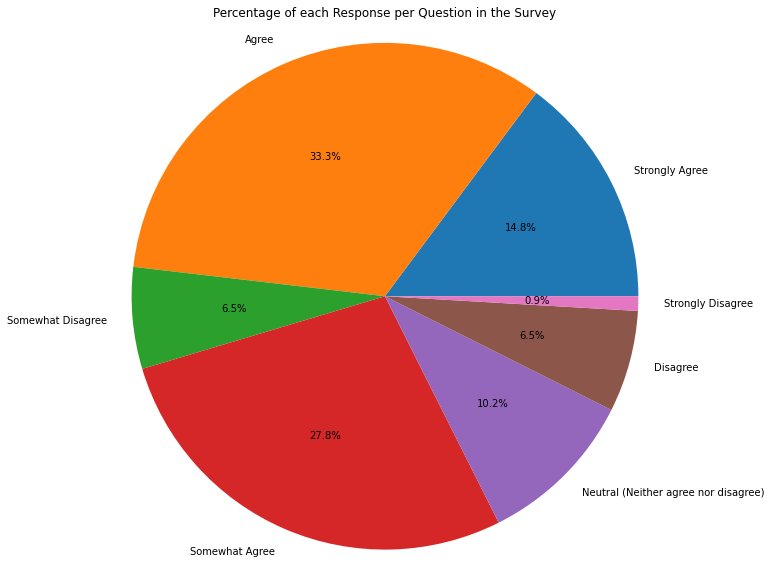

None
{'Neutral (Neither agree nor disagree)': 16, 'Strongly Agree': 16, 'Agree': 35, 'Somewhat Disagree': 12, 'Somewhat Agree': 25, 'Disagree': 2, 'Strongly Disagree': 2}


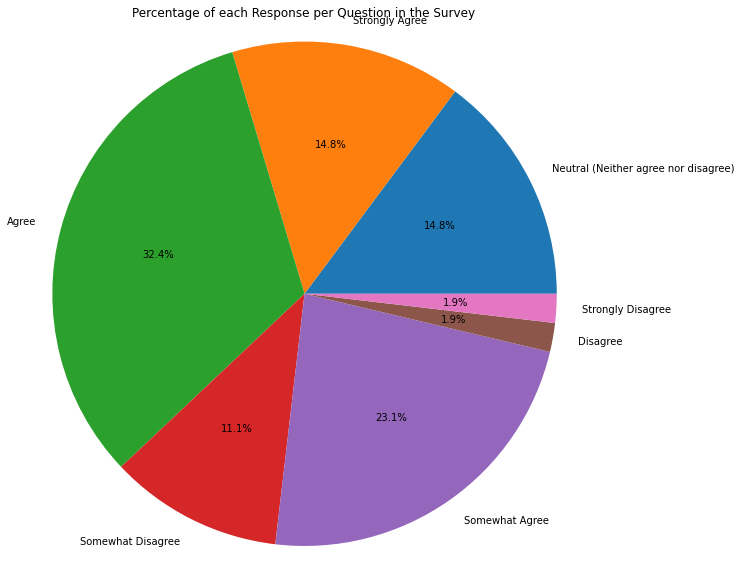

None
{'Strongly Agree': 14, 'Disagree': 9, 'Somewhat Disagree': 9, 'Somewhat Agree': 22, 'Agree': 29, 'Neutral (Neither agree nor disagree)': 23, 'Strongly Disagree': 2}


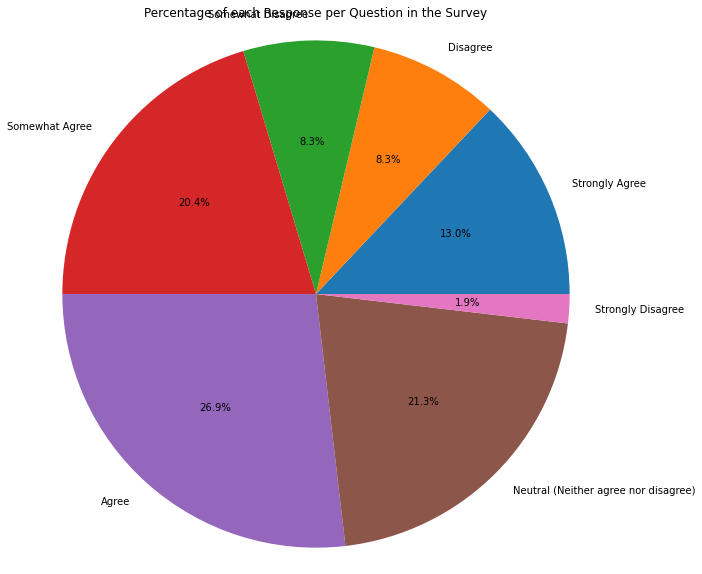

None
{'Strongly Agree': 9, 'Disagree': 3, 'Somewhat Disagree': 11, 'Neutral (Neither agree nor disagree)': 20, 'Agree': 33, 'Somewhat Agree': 29, 'Strongly Disagree': 3}


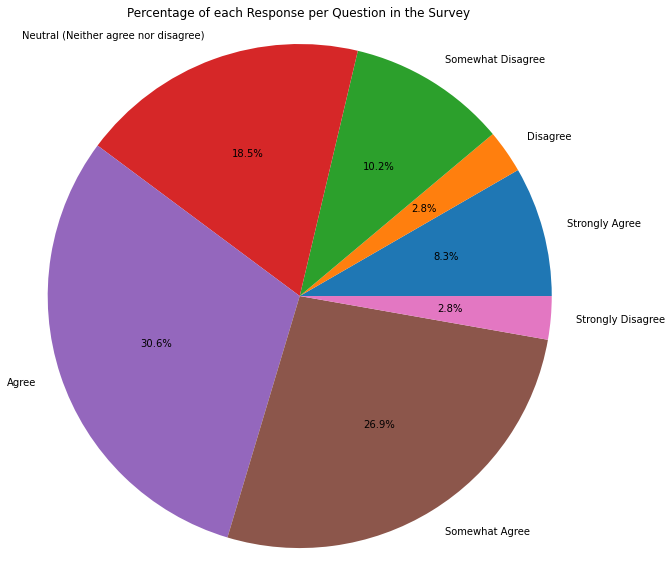

None
{'Somewhat Agree': 34, 'Somewhat Disagree': 12, 'Neutral (Neither agree nor disagree)': 17, 'Agree': 30, 'Disagree': 4, 'Strongly Disagree': 2, 'Strongly Agree': 9}


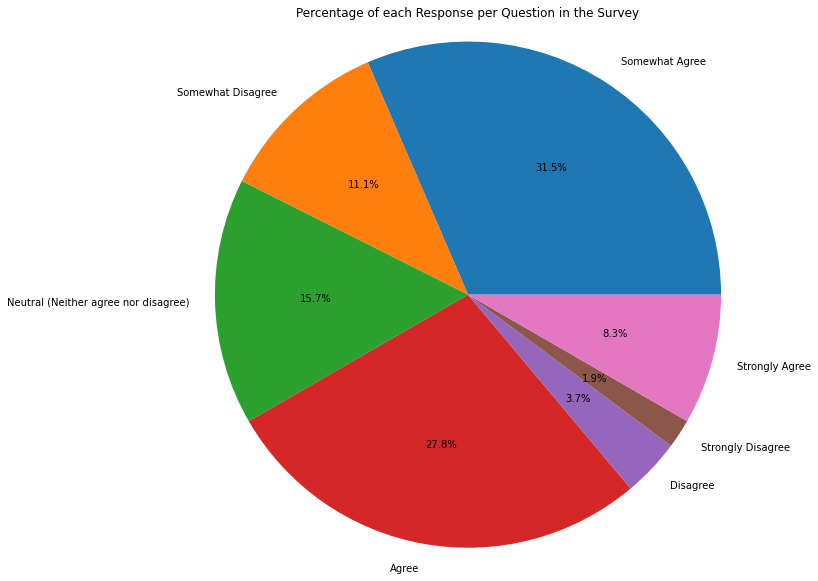

None
{'Strongly Agree': 13, 'Somewhat Disagree': 7, 'Disagree': 7, 'Somewhat Agree': 29, 'Agree': 38, 'Neutral (Neither agree nor disagree)': 12, 'Strongly Disagree': 2}


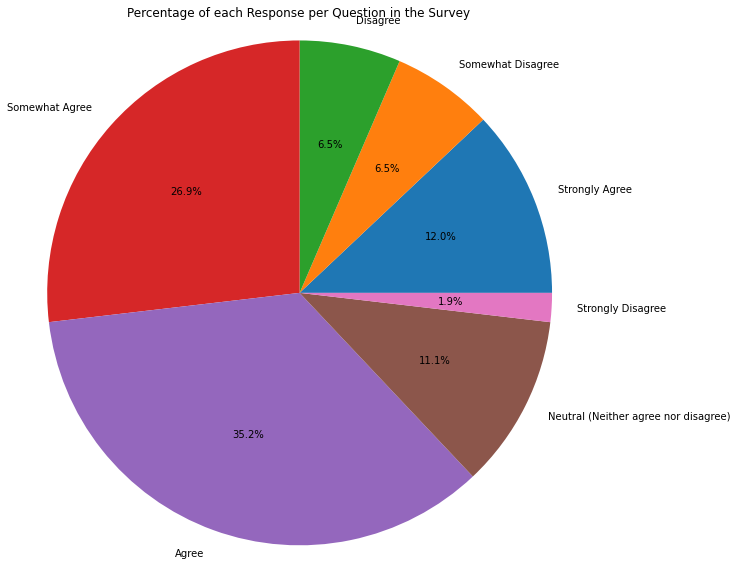

None
{'Strongly Agree': 14, 'Agree': 33, 'Strongly Disagree': 4, 'Somewhat Agree': 27, 'Neutral (Neither agree nor disagree)': 16, 'Somewhat Disagree': 11, 'Disagree': 3}


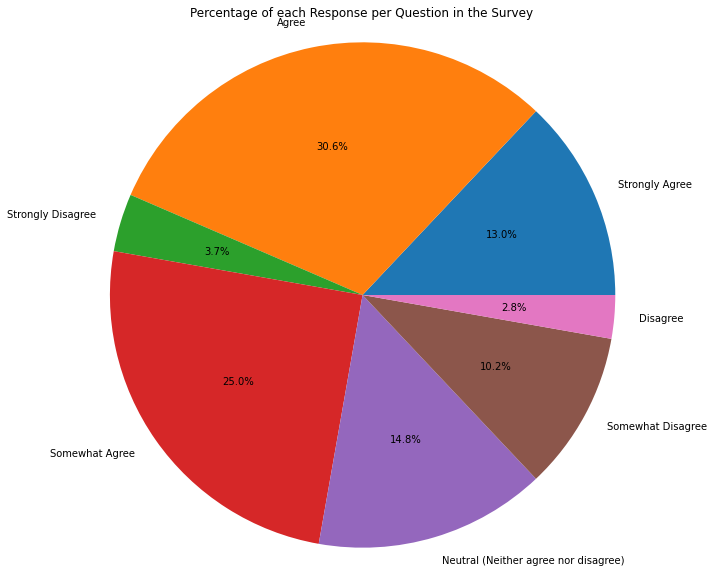

None
{'Neutral (Neither agree nor disagree)': 12, 'Strongly Disagree': 4, 'Somewhat Agree': 37, 'Agree': 31, 'Somewhat Disagree': 6, 'Disagree': 6, 'Strongly Agree': 12}


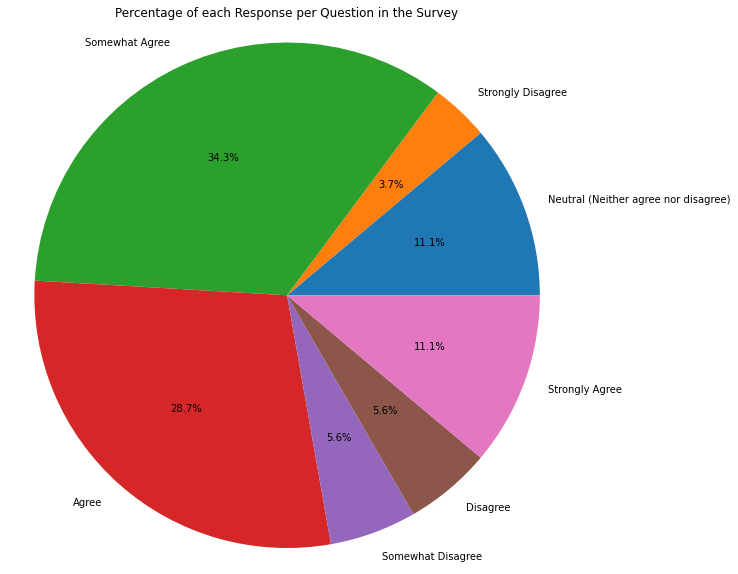

None
{'Somewhat Agree': 29, 'Strongly Disagree': 5, 'Somewhat Disagree': 8, 'Disagree': 9, 'Neutral (Neither agree nor disagree)': 19, 'Agree': 22, 'Strongly Agree': 16}


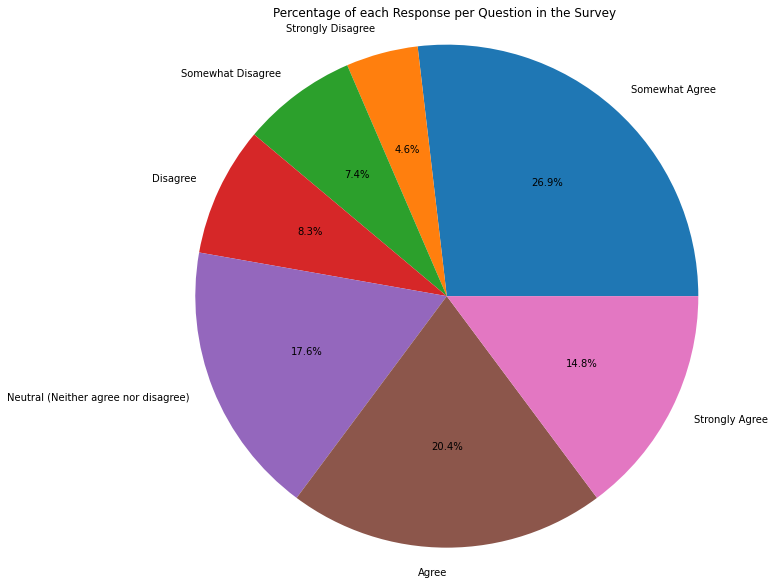

None
{'Somewhat Agree': 25, 'Agree': 33, 'Strongly Disagree': 6, 'Somewhat Disagree': 6, 'Neutral (Neither agree nor disagree)': 23, 'Disagree': 3, 'Strongly Agree': 12}


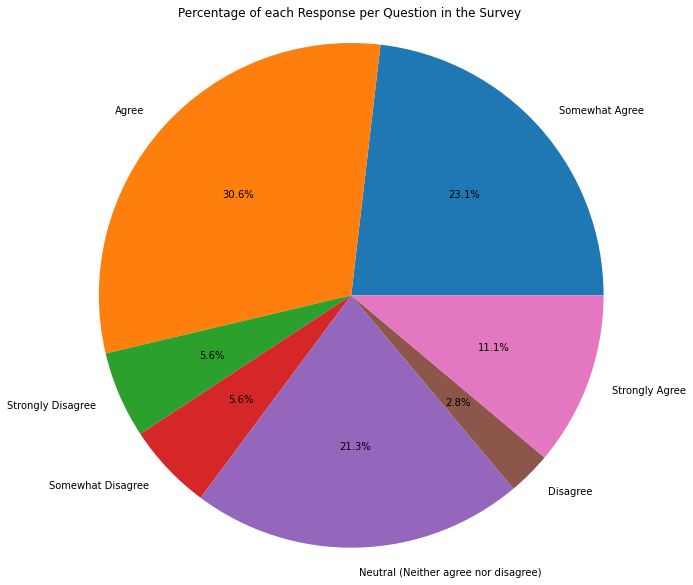

None
{'Strongly Agree': 14, 'Agree': 30, 'Strongly Disagree': 4, 'Disagree': 4, 'Somewhat Agree': 25, 'Somewhat Disagree': 12, 'Neutral (Neither agree nor disagree)': 19}


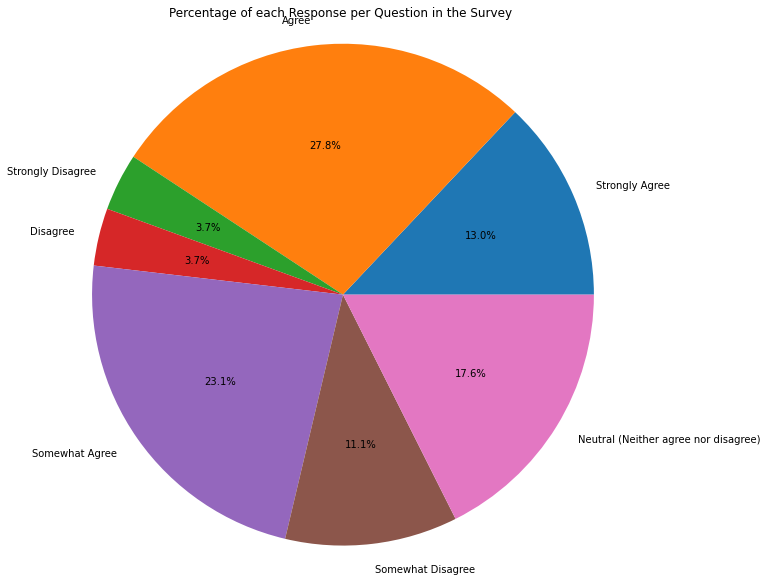

None
{'Strongly Agree': 20, 'Strongly Disagree': 3, 'Somewhat Disagree': 7, 'Somewhat Agree': 25, 'Neutral (Neither agree nor disagree)': 15, 'Agree': 36, 'Disagree': 2}


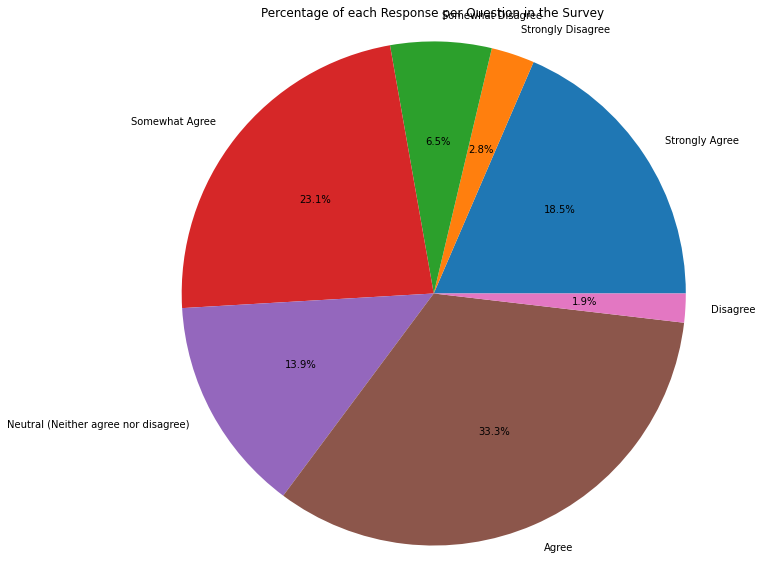

None
{'Strongly Agree': 23, 'Strongly Disagree': 4, 'Agree': 23, 'Somewhat Agree': 38, 'Somewhat Disagree': 3, 'Disagree': 4, 'Neutral (Neither agree nor disagree)': 13}


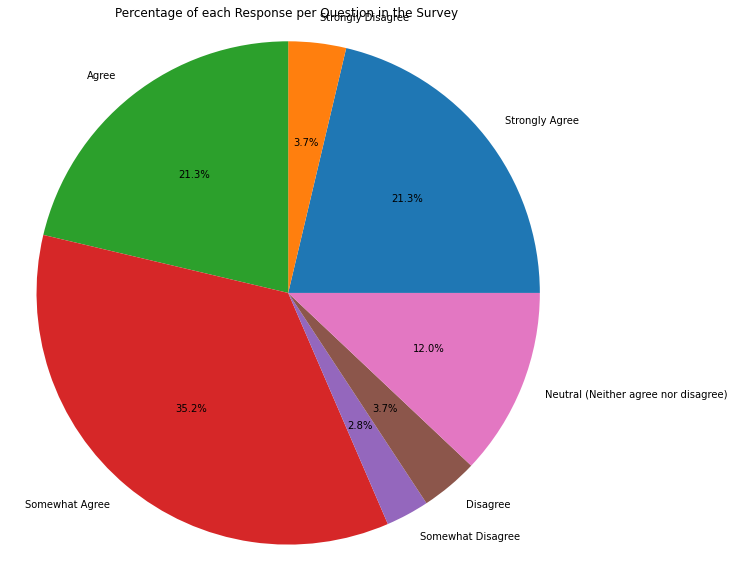

None
{'Agree': 39, 'Strongly Disagree': 3, 'Neutral (Neither agree nor disagree)': 14, 'Somewhat Agree': 30, 'Somewhat Disagree': 10, 'Strongly Agree': 12}


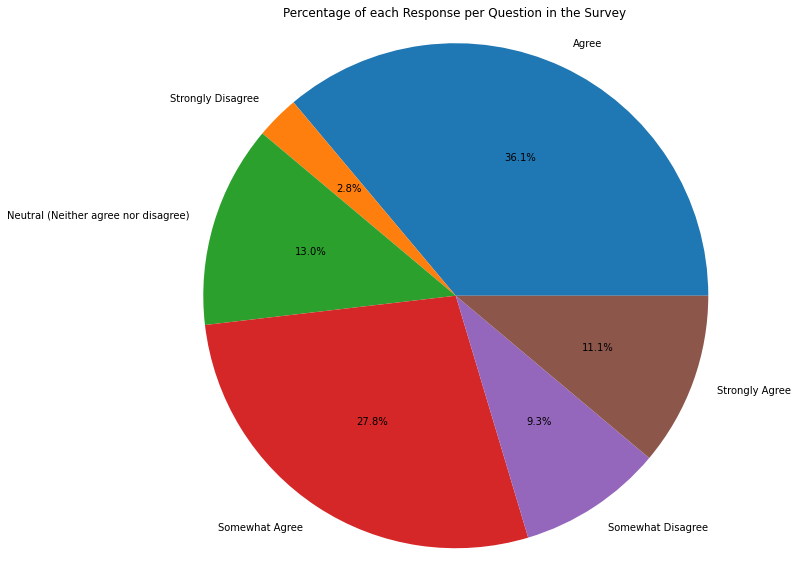

None
{'Strongly Agree': 18, 'Agree': 30, 'Strongly Disagree': 3, 'Somewhat Agree': 23, 'Somewhat Disagree': 12, 'Disagree': 5, 'Neutral (Neither agree nor disagree)': 17}


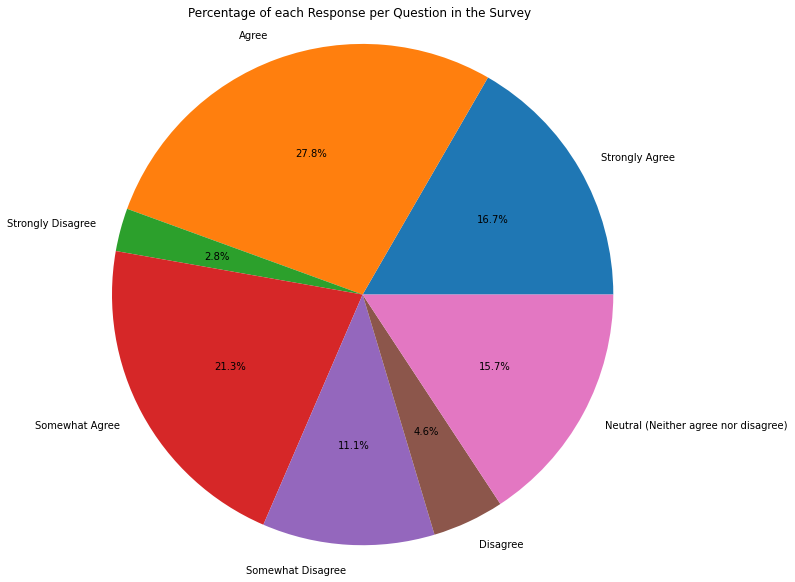

None
{'Agree': 28, 'Somewhat Agree': 24, 'Strongly Disagree': 4, 'Somewhat Disagree': 8, 'Neutral (Neither agree nor disagree)': 25, 'Disagree': 5, 'Strongly Agree': 14}


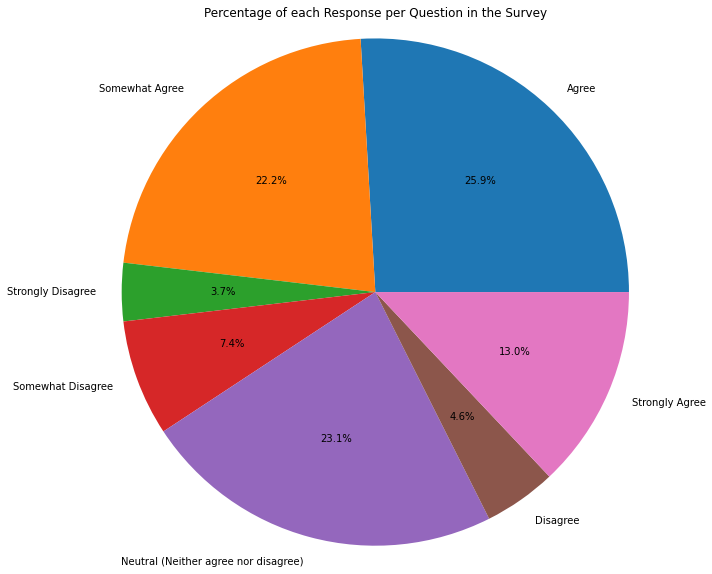

None
{'Strongly Agree': 8, 'Somewhat Agree': 40, 'Somewhat Disagree': 8, 'Agree': 27, 'Neutral (Neither agree nor disagree)': 18, 'Disagree': 3, 'Strongly Disagree': 4}


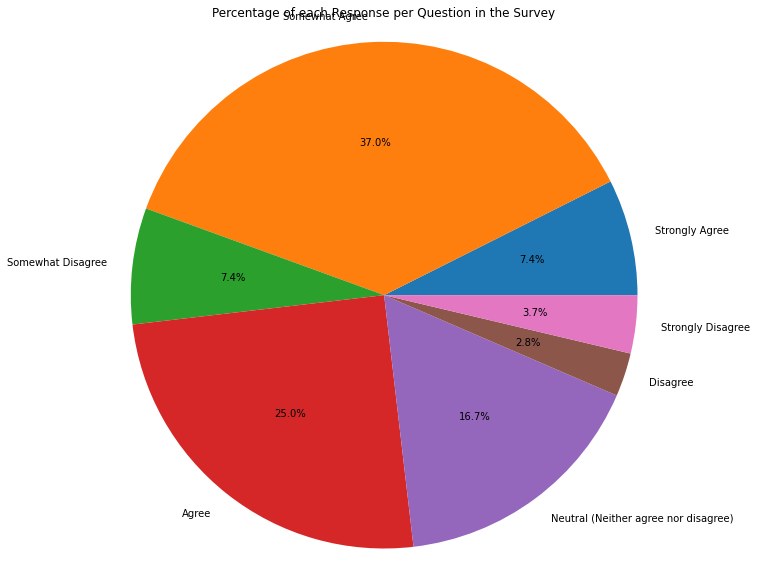

None
{'Strongly Agree': 10, 'Agree': 23, 'Somewhat Agree': 33, 'Somewhat Disagree': 9, 'Disagree': 5, 'Neutral (Neither agree nor disagree)': 25, 'Strongly Disagree': 3}


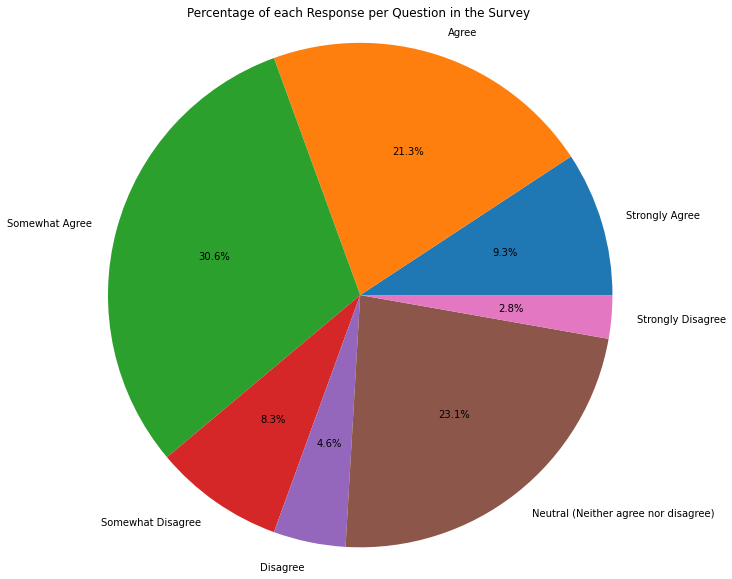

None
{'Somewhat Agree': 35, 'Disagree': 8, 'Somewhat Disagree': 9, 'Neutral (Neither agree nor disagree)': 20, 'Agree': 28, 'Strongly Agree': 6, 'Strongly Disagree': 2}


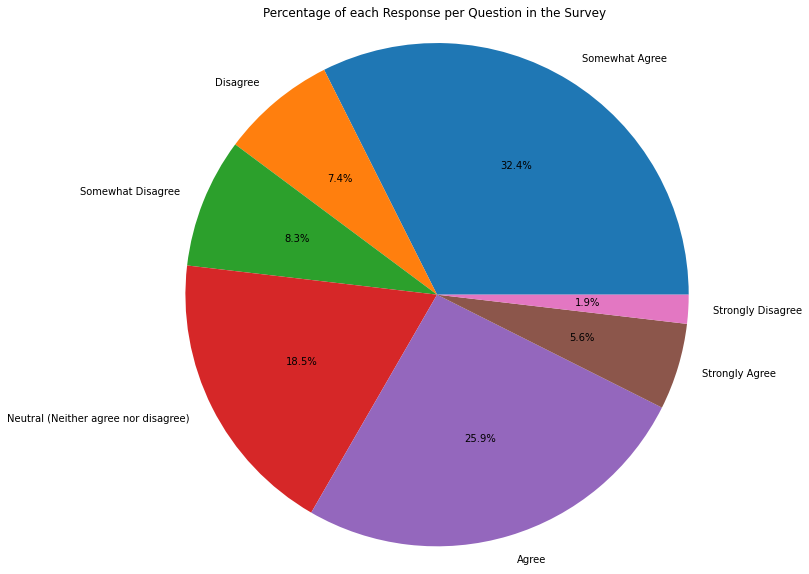

None
{'Strongly Agree': 15, 'Agree': 25, 'Neutral (Neither agree nor disagree)': 18, 'Somewhat Agree': 36, 'Somewhat Disagree': 10, 'Disagree': 3, 'Strongly Disagree': 1}


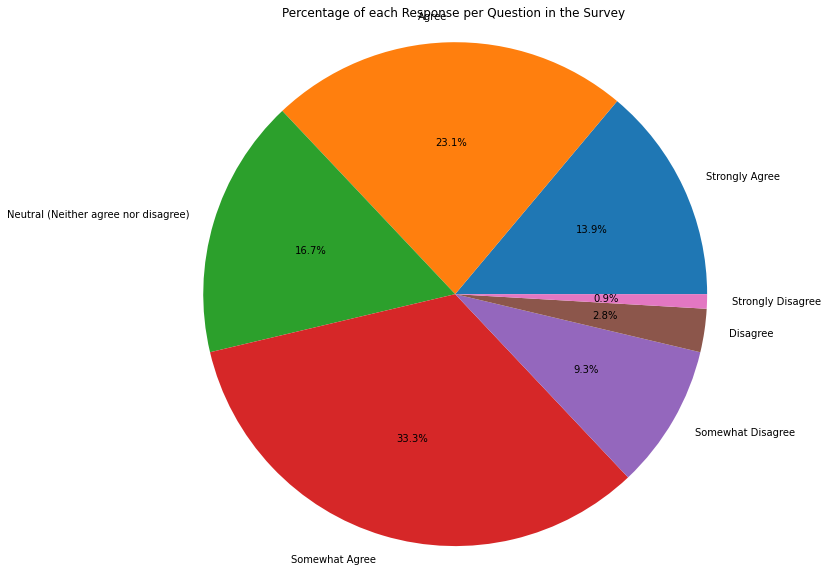

None
{'Somewhat Agree': 28, 'Agree': 26, 'Neutral (Neither agree nor disagree)': 32, 'Somewhat Disagree': 11, 'Strongly Agree': 7, 'Disagree': 2, 'Strongly Disagree': 2}


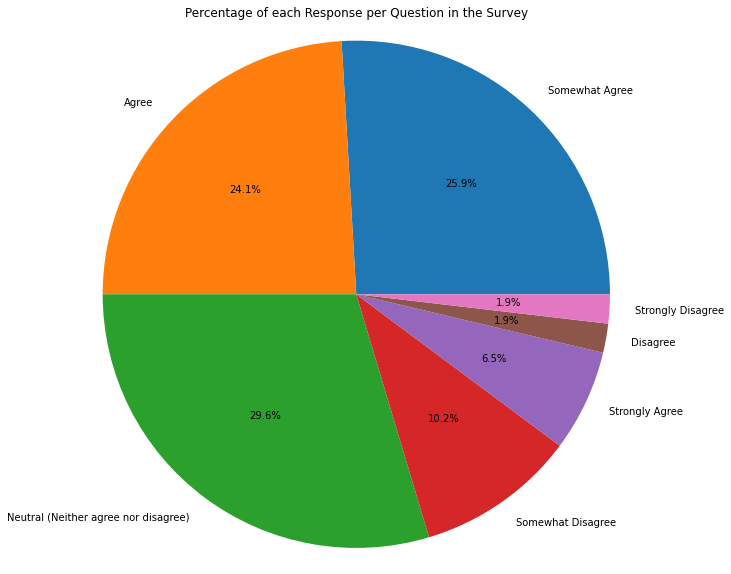

None
{'Strongly Agree': 8, 'Somewhat Agree': 40, 'Agree': 23, 'Neutral (Neither agree nor disagree)': 17, 'Somewhat Disagree': 7, 'Disagree': 9, 'Strongly Disagree': 4}


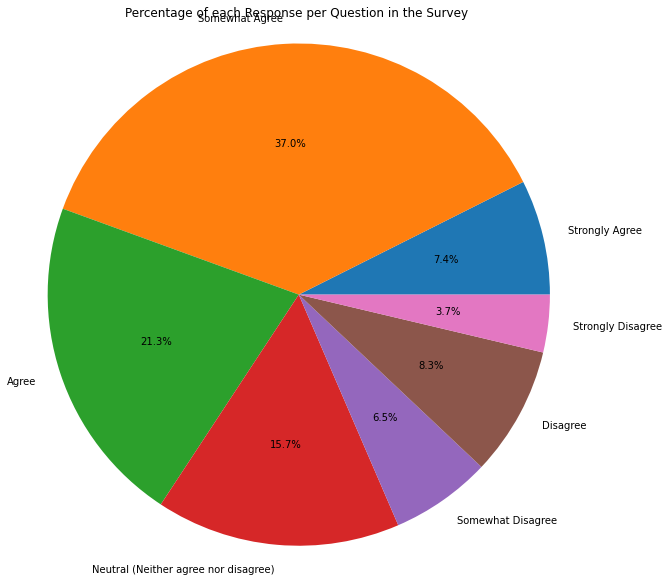

None
{'Agree': 38, 'Strongly Agree': 6, 'Somewhat Agree': 28, 'Somewhat Disagree': 8, 'Neutral (Neither agree nor disagree)': 19, 'Disagree': 5, 'Strongly Disagree': 4}


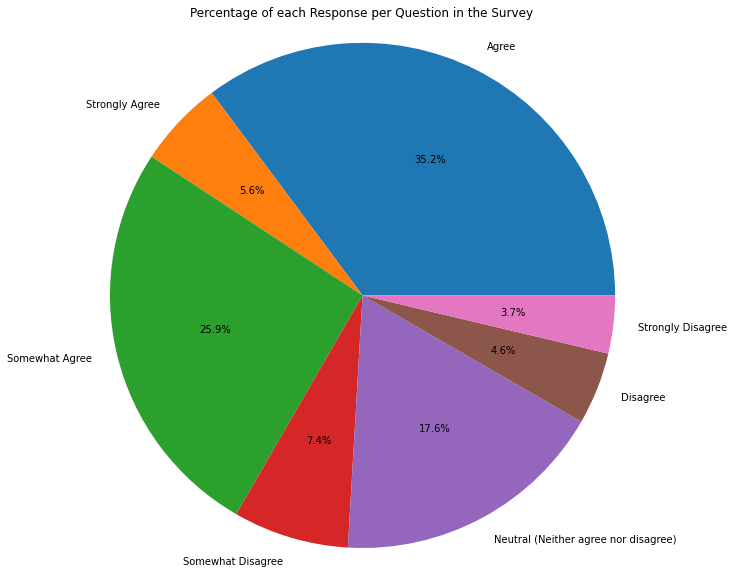

None
{'Neutral (Neither agree nor disagree)': 24, 'Somewhat Agree': 35, 'Somewhat Disagree': 3, 'Strongly Agree': 13, 'Disagree': 5, 'Agree': 25, 'Strongly Disagree': 3}


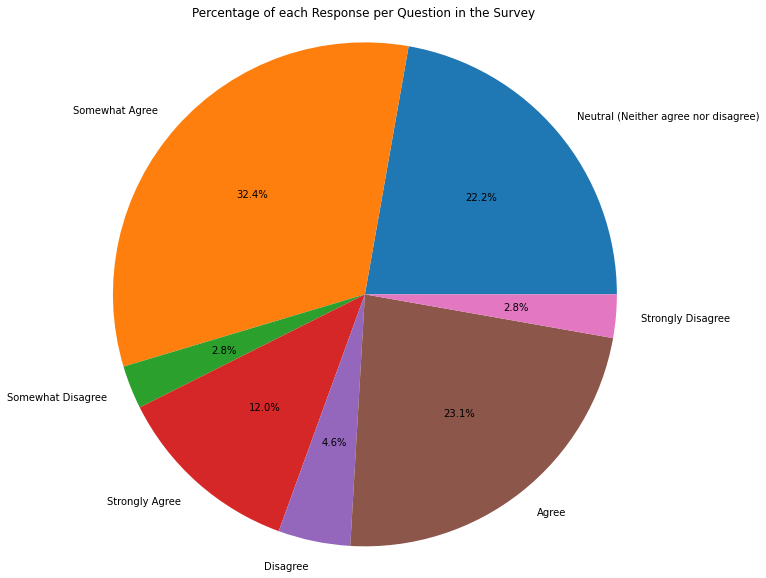

None
{'Strongly Agree': 15, 'Somewhat Disagree': 12, 'Somewhat Agree': 35, 'Disagree': 2, 'Neutral (Neither agree nor disagree)': 20, 'Agree': 23, 'Strongly Disagree': 1}


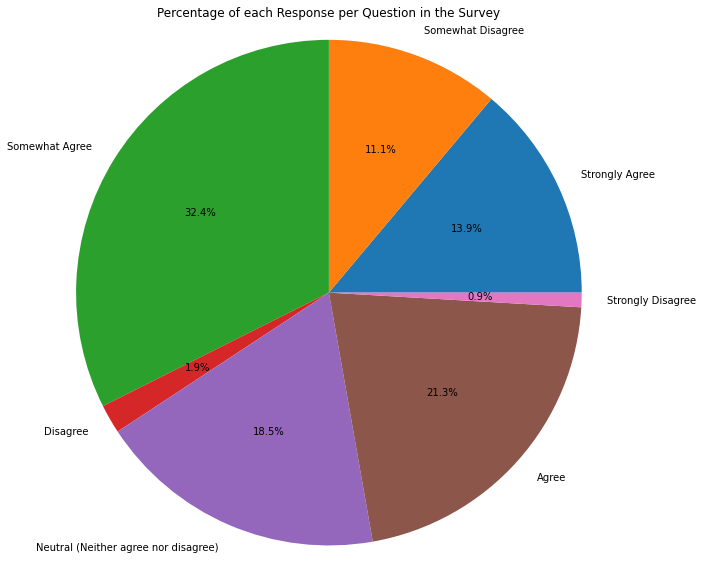

None
{'Strongly Agree': 15, 'Agree': 39, 'Somewhat Disagree': 12, 'Somewhat Agree': 22, 'Neutral (Neither agree nor disagree)': 13, 'Disagree': 5, 'Strongly Disagree': 2}


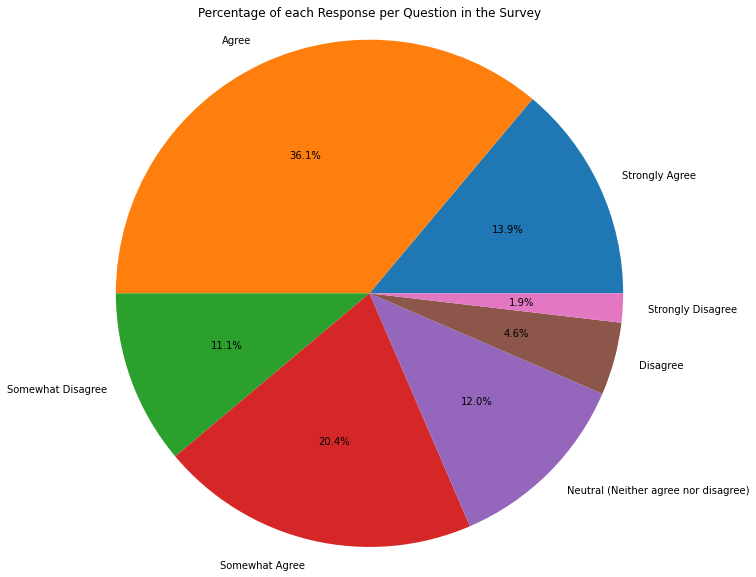

None
{'Agree': 36, 'Disagree': 7, 'Neutral (Neither agree nor disagree)': 20, 'Somewhat Agree': 19, 'Somewhat Disagree': 5, 'Strongly Agree': 19, 'Strongly Disagree': 2}


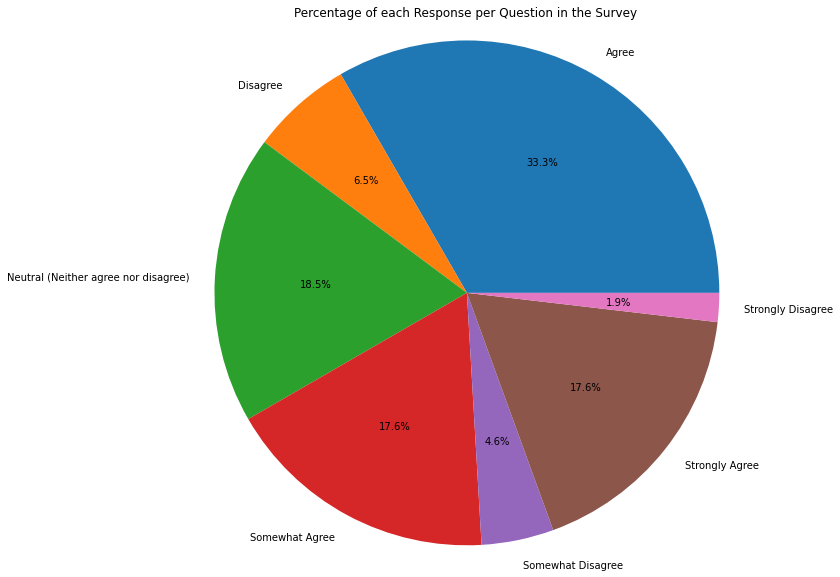

None
{'Somewhat Agree': 23, 'Strongly Disagree': 3, 'Somewhat Disagree': 10, 'Disagree': 5, 'Neutral (Neither agree nor disagree)': 23, 'Agree': 30, 'Strongly Agree': 14}


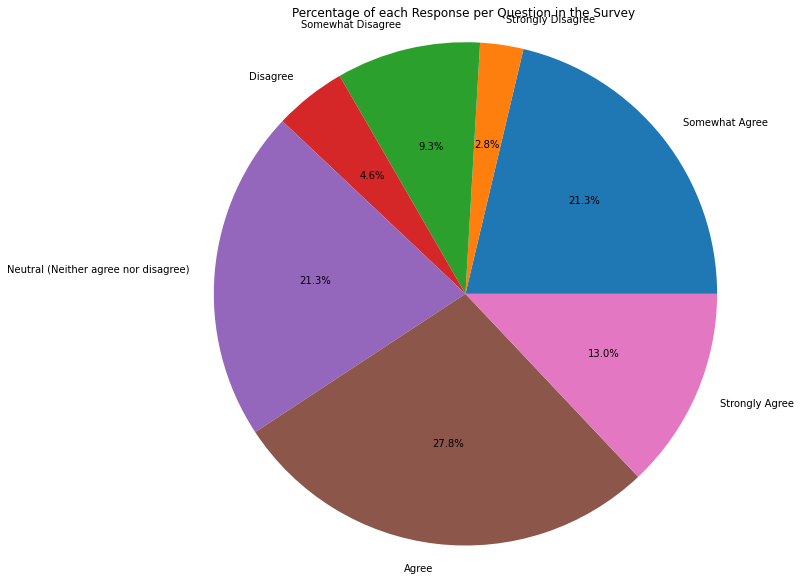

None
{'Agree': 35, 'Strongly Disagree': 4, 'Neutral (Neither agree nor disagree)': 25, 'Somewhat Agree': 27, 'Somewhat Disagree': 6, 'Strongly Agree': 11}


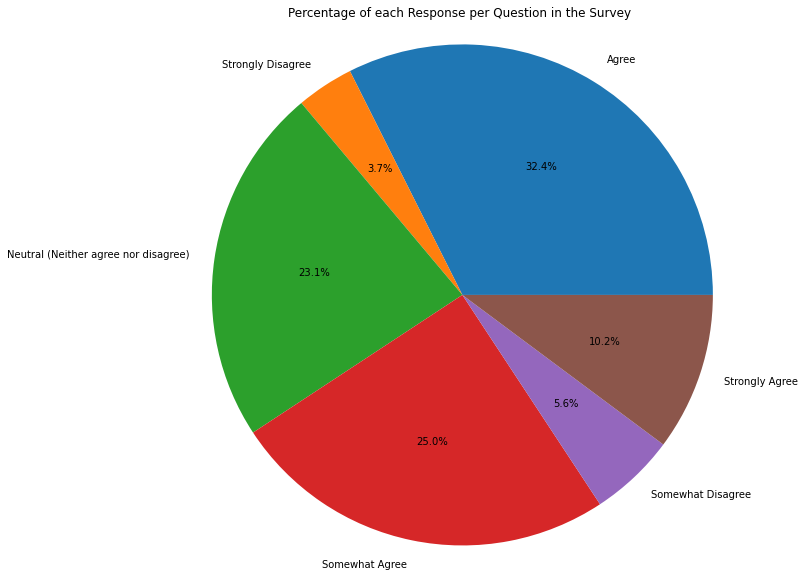

None
{'Strongly Agree': 14, 'Strongly Disagree': 3, 'Neutral (Neither agree nor disagree)': 16, 'Somewhat Agree': 27, 'Agree': 36, 'Somewhat Disagree': 8, 'Disagree': 4}


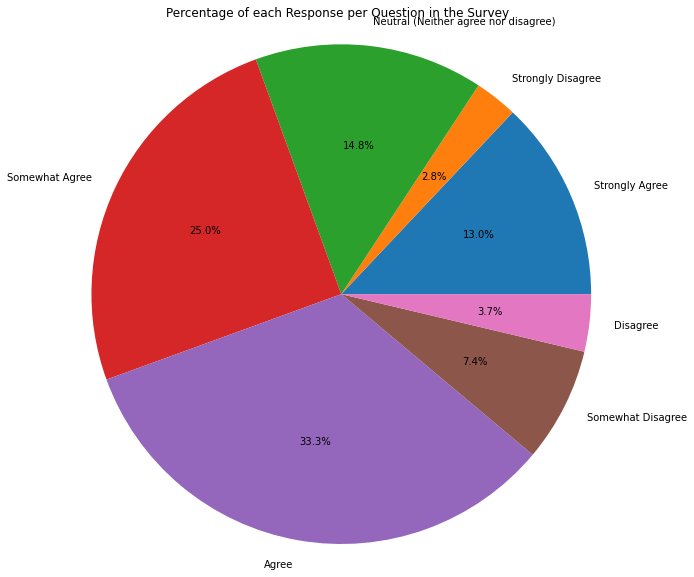

None
{'Somewhat Disagree': 14, 'Somewhat Agree': 34, 'Strongly Disagree': 3, 'Agree': 28, 'Disagree': 4, 'Neutral (Neither agree nor disagree)': 15, 'Strongly Agree': 10}


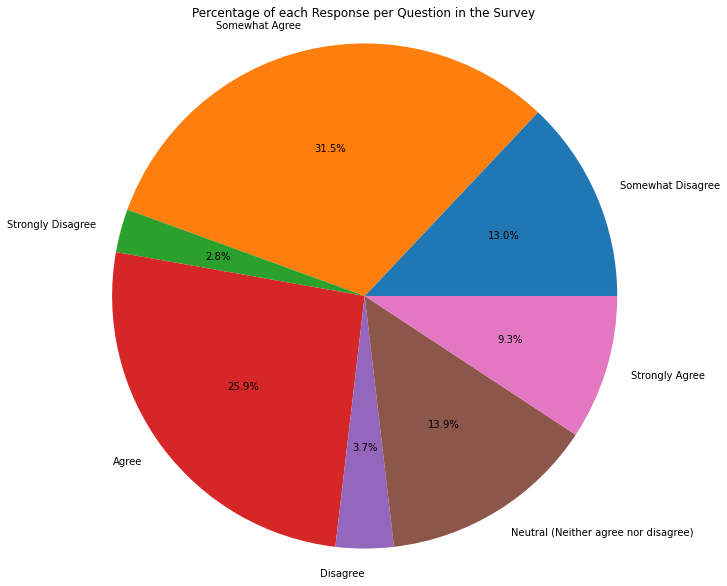

None
{'Somewhat Agree': 34, 'Agree': 23, 'Strongly Disagree': 3, 'Neutral (Neither agree nor disagree)': 18, 'Somewhat Disagree': 8, 'Disagree': 6, 'Strongly Agree': 16}


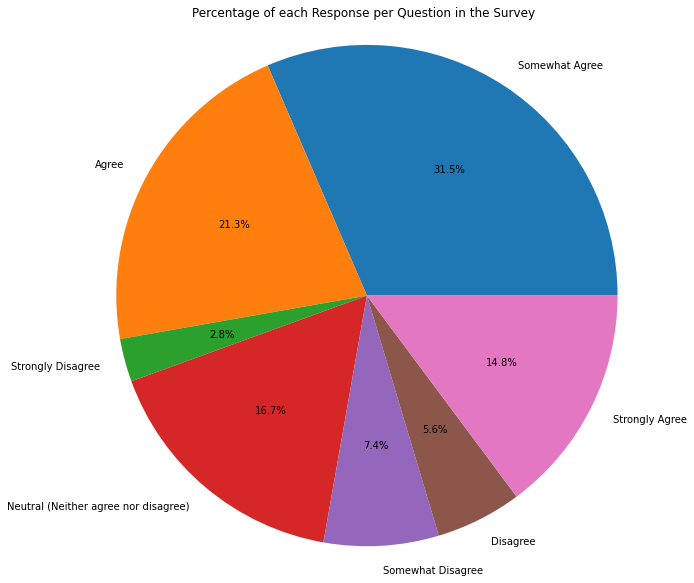

None
{'Agree': 27, 'Somewhat Agree': 31, 'Strongly Disagree': 7, 'Somewhat Disagree': 8, 'Neutral (Neither agree nor disagree)': 15, 'Strongly Agree': 20}


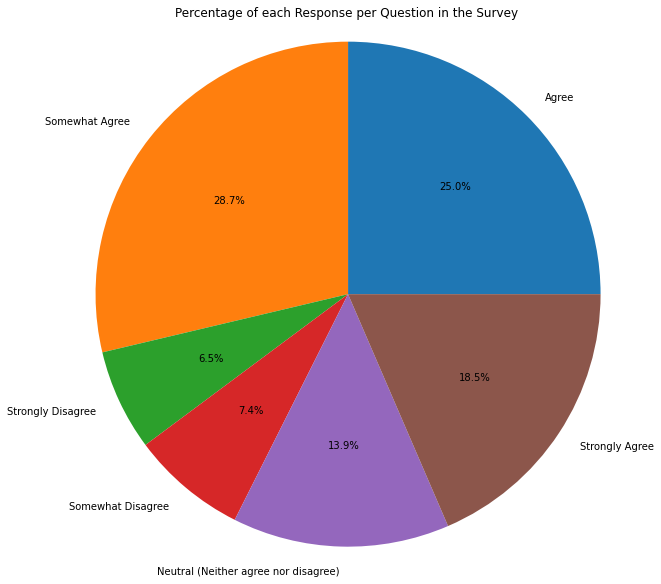

None
{'Disagree': 8, 'Agree': 31, 'Strongly Disagree': 5, 'Somewhat Disagree': 11, 'Neutral (Neither agree nor disagree)': 18, 'Somewhat Agree': 26, 'Strongly Agree': 9}


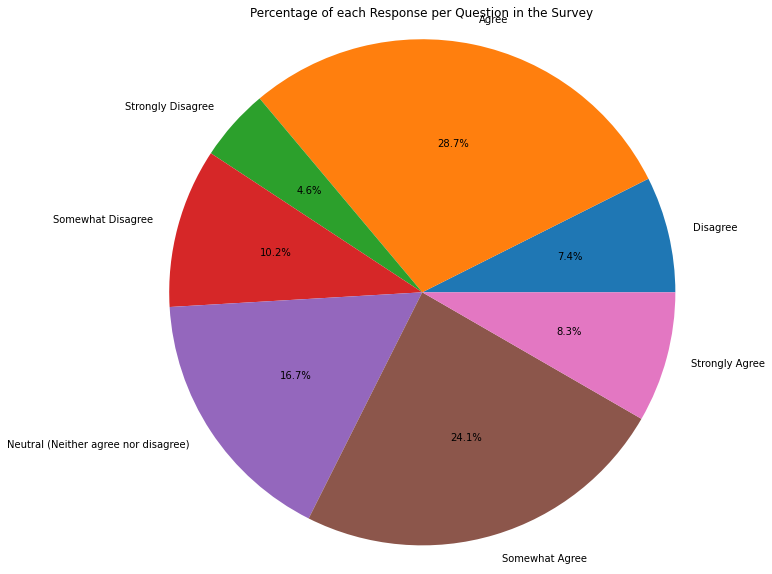

None
{'Somewhat Disagree': 12, 'Somewhat Agree': 33, 'Strongly Disagree': 3, 'Neutral (Neither agree nor disagree)': 27, 'Agree': 24, 'Disagree': 3, 'Strongly Agree': 6}


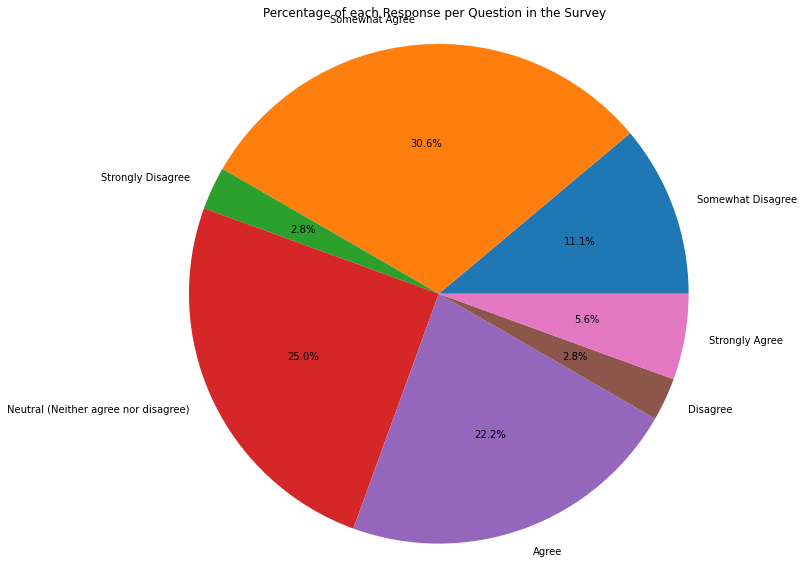

None
{'Somewhat Agree': 32, 'Agree': 22, 'Strongly Disagree': 3, 'Somewhat Disagree': 14, 'Neutral (Neither agree nor disagree)': 24, 'Strongly Agree': 8, 'Disagree': 5}


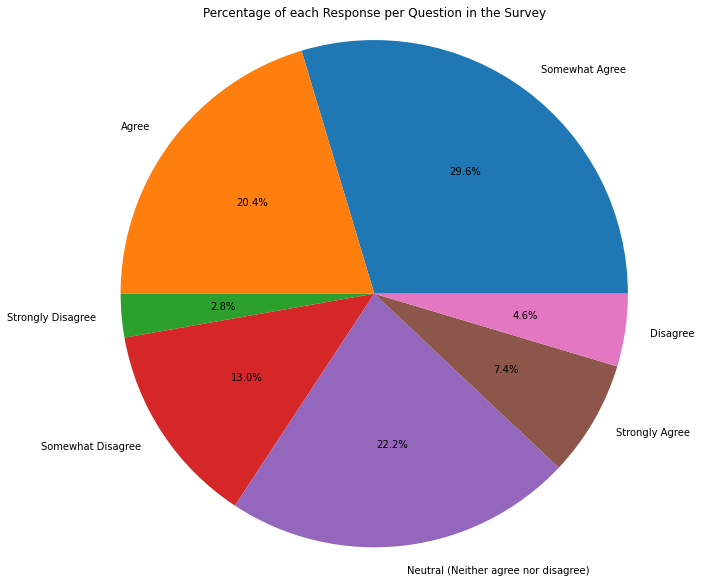

None
{'Somewhat Agree': 30, 'Strongly Disagree': 3, 'Neutral (Neither agree nor disagree)': 24, 'Disagree': 4, 'Agree': 22, 'Somewhat Disagree': 13, 'Strongly Agree': 12}


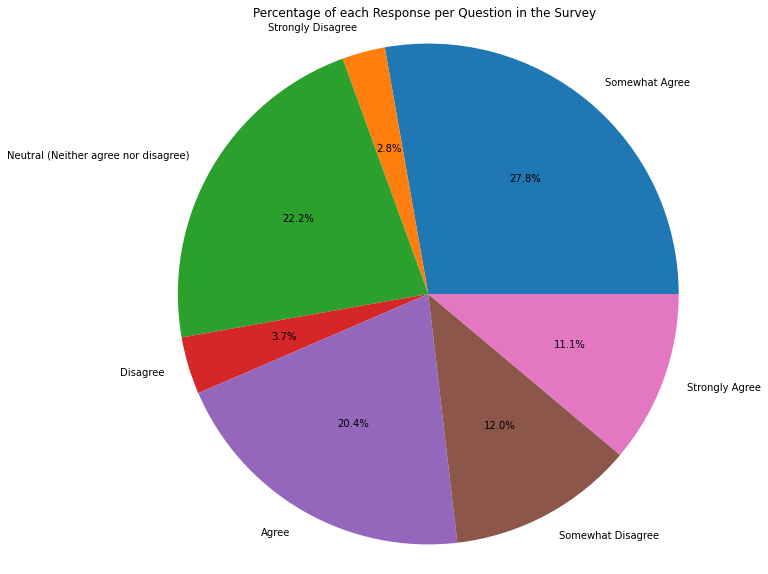

None
{'Strongly Agree': 19, 'Agree': 29, 'Strongly Disagree': 2, 'Somewhat Agree': 31, 'Neutral (Neither agree nor disagree)': 14, 'Somewhat Disagree': 7, 'Disagree': 6}


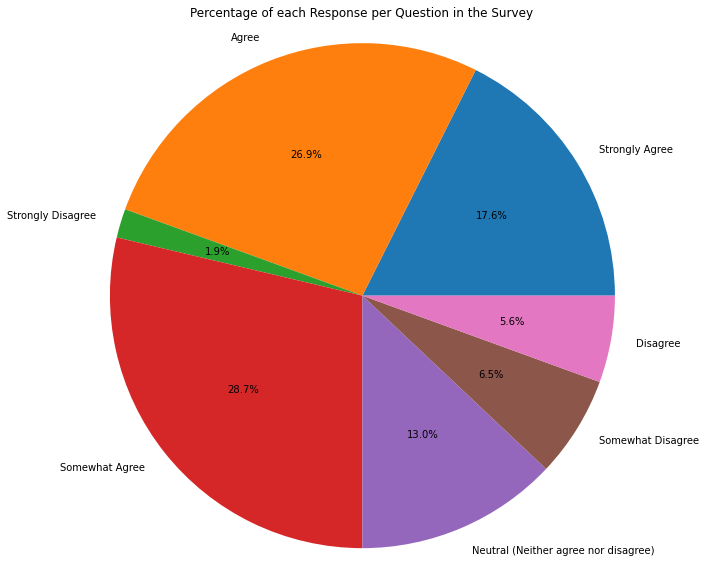

None
{'Strongly Agree': 21, 'Agree': 36, 'Strongly Disagree': 2, 'Neutral (Neither agree nor disagree)': 14, 'Somewhat Disagree': 11, 'Somewhat Agree': 21, 'Disagree': 3}


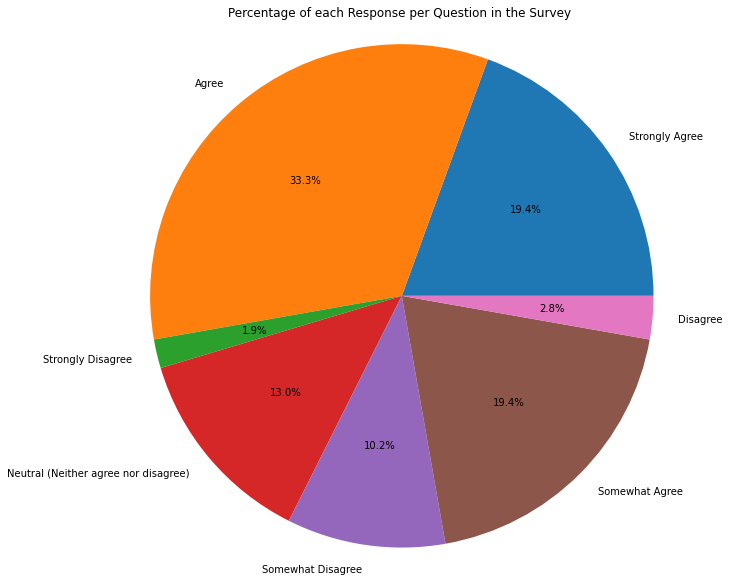

None
{'Somewhat Agree': 27, 'Strongly Agree': 19, 'Strongly Disagree': 3, 'Somewhat Disagree': 11, 'Neutral (Neither agree nor disagree)': 14, 'Agree': 29, 'Disagree': 5}


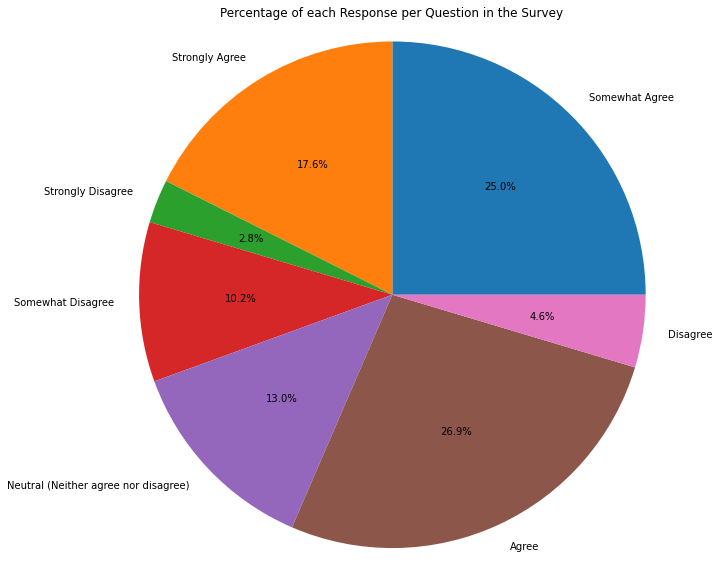

None
{'Agree': 40, 'Somewhat Agree': 30, 'Strongly Disagree': 3, 'Neutral (Neither agree nor disagree)': 16, 'Somewhat Disagree': 7, 'Disagree': 2, 'Strongly Agree': 10}


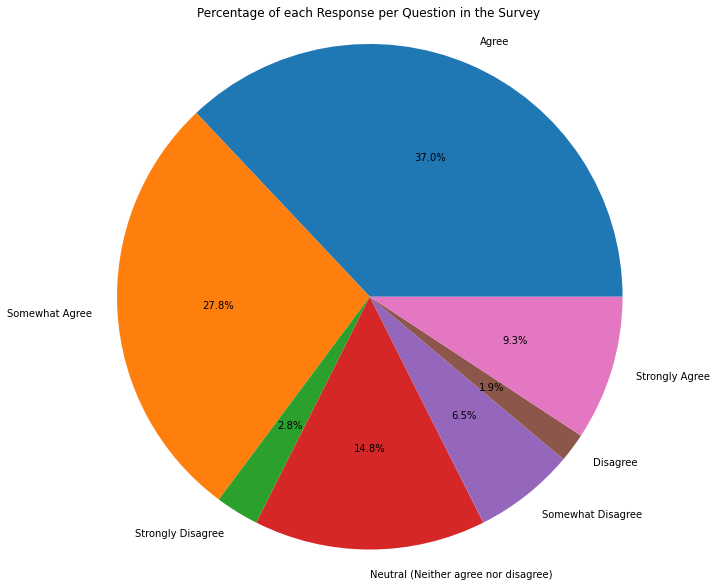

None
{'Somewhat Disagree': 10, 'Strongly Agree': 16, 'Strongly Disagree': 3, 'Somewhat Agree': 27, 'Agree': 39, 'Neutral (Neither agree nor disagree)': 13}


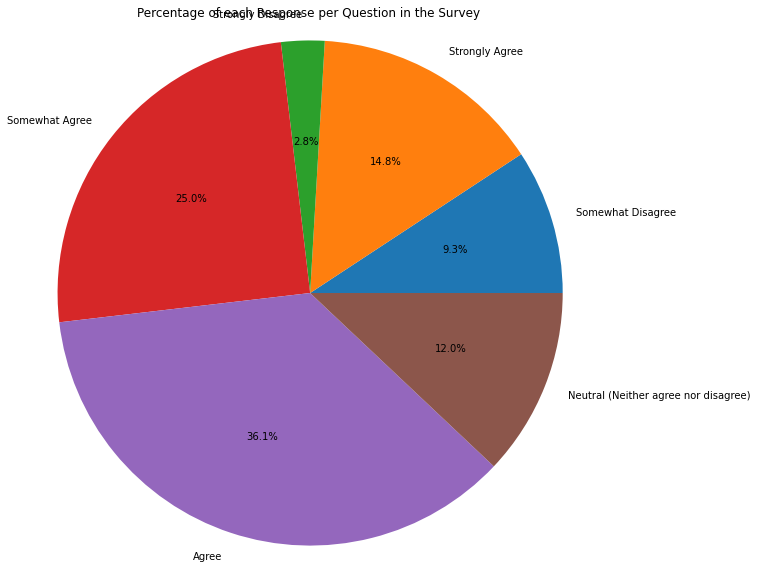

None
{'Agree': 21, 'Strongly Agree': 18, 'Strongly Disagree': 2, 'Somewhat Agree': 24, 'Neutral (Neither agree nor disagree)': 27, 'Somewhat Disagree': 14, 'Disagree': 2}


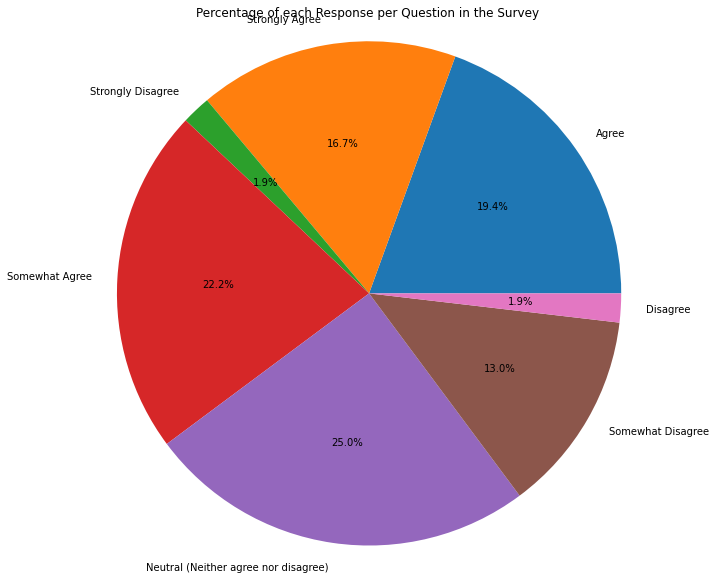

None


In [104]:
#This determines the unique repsonses and their freqeuncies for each question. 
#This is then visualized in pie charts below
for column in df:
    unique_val = df[column].unique()
    col_data = df[column]
    total = {}
    for i in unique_val:
        count = 0
        for index in col_data:
            if i == index:
                count = count + 1
            if i != index:
                continue
            total[i] = count
    print(total)
    frequency = list(total.values())
    category = list(total.keys())
    plt.figure(figsize=(10, 10)) 
    plt.pie(frequency, labels = category, autopct = '%1.1f%%')  
    plt.axis('equal')
    plt.title(f'Percentage of each Response per Question in the Survey') 
    print(plt.show())

        

In [105]:
from IPython.display import display

#Depict the data seen in these above visualizations in dictionaries for each question
print('Here are the frequencies for each response in every question')
for column in df:
    unique_val = df[column].unique()
    col_data = df[column]
    total = {}
    for i in unique_val:
        count = 0
        for index in col_data:
            if i == index:
                count = count + 1
            if i != index:
                continue
            total[i] = count
    print(column)
    print()
    print(total)
    print()
    print()

Here are the frequencies for each response in every question
  Q1

{'United States of America': 90, 'United Kingdom': 7, 'United Arab Emirates': 2, 'Japan': 1, 'Australia': 1, 'Canada': 2, 'Germany': 1, 'India': 4}


Q2.

{'31-40 Years': 19, '41-50 Years': 39, '51-60 Years': 22, '>60 Years': 9, '18-30 Years': 19}


  Q3

{'Distributed DBMS': 20, 'Blockchain Technology (BCT)': 38, 'Electronic Data Interchange (EDI)': 24, 'Research': 4, 'Research ': 2, 'B2B-Commerce': 12, 'Research and Development': 1, 'R&D': 4, 'ERP ; Banking and Financial Application ; Contact center ;': 1, 'Mobile apps': 1, 'RPA': 1}


 Q4

{'Artificial Intelligence': 18, 'Internet of Things (IoT)': 7, 'Blockchain Technology': 36, 'Electronic Data Interchange (EDI)': 12, 'Cloud Computing': 9, 'Robotics': 2, 'Social Media Technologies': 2, 'Gaming': 5, 'B2B-Commerce': 9, 'Distributed DBMS': 7, 'Other': 1}


  Q5

{'Other': 10, 'Business Development Manager': 10, 'IT Director': 14, 'Chief Technology Officer, Chief Infor

Q.10.(a)

{'Strongly Agree': 15, 'Somewhat Disagree': 12, 'Somewhat Agree': 35, 'Disagree': 2, 'Neutral (Neither agree nor disagree)': 20, 'Agree': 23, 'Strongly Disagree': 1}


Q.10.(b)

{'Strongly Agree': 15, 'Agree': 39, 'Somewhat Disagree': 12, 'Somewhat Agree': 22, 'Neutral (Neither agree nor disagree)': 13, 'Disagree': 5, 'Strongly Disagree': 2}


Q.10.(c)

{'Agree': 36, 'Disagree': 7, 'Neutral (Neither agree nor disagree)': 20, 'Somewhat Agree': 19, 'Somewhat Disagree': 5, 'Strongly Agree': 19, 'Strongly Disagree': 2}


Q.11.(a)

{'Somewhat Agree': 23, 'Strongly Disagree': 3, 'Somewhat Disagree': 10, 'Disagree': 5, 'Neutral (Neither agree nor disagree)': 23, 'Agree': 30, 'Strongly Agree': 14}


Q.11.(b)

{'Agree': 35, 'Strongly Disagree': 4, 'Neutral (Neither agree nor disagree)': 25, 'Somewhat Agree': 27, 'Somewhat Disagree': 6, 'Strongly Agree': 11}


Q.11.(c)

{'Strongly Agree': 14, 'Strongly Disagree': 3, 'Neutral (Neither agree nor disagree)': 16, 'Somewhat Agree': 27, 'Agr

Preparation for Factor Analysis

In [106]:
#This defines the constructs and their relations to certain survey questions.
#This will be essential in the factor analysis using the SMARTPLS4 software.
constructs = {
    'Perceived benefits (PB)': 
    ['Q.1.(a)',
    'Q.1.(b)',
    'Q.1.(c)',
    'Q.1.(d)',
    'Q.1.(e)'
    ],  
    'Perceived compatibility (PC)': 
    ['Q.2.(a)',
     'Q.2.(b)',
     'Q.2.(c)'
    ],
    'Perceived complexity (PCM)':
    ['Q.3.(a)',
     'Q.3.(b)',
     'Q.3.(c)'
    ],
    'Perceived information transparency (PIT)':
    ['Q.4.(a)',
     'Q.4.(b)',
     'Q.4.(c)'
    ],
    'Perceived disintermediation (PD)':
    ['Q.5.(a)',
     'Q.5.(b)',
     'Q.5.(c)',
     'Q.5.(d)' 
    ],
    'Standards uncertainty (SU)':
    ['Q.6.(a)',
     'Q.6.(b)',
     'Q.6.(c)',
     'Q.6.(d)',
     'Q.6.(e)'
    ],
    'Top management support (TMS)':
    ['Q.7.(a)',
    'Q.7.(b)',
    'Q.7.(c)'
    ],
    'Organizational innovativeness (OI)':
    ['Q.8.(a)',
     'Q.8.(b)',
     'Q.8.(c)'
    ],
    'Organizational learning capability (OLC)':
    ['Q.9.(a)',
    'Q.9.(b)',
    'Q.9.(c)',
    'Q.9.(d)',
    'Q.9.(e)',
    'Q.9.(f)',
    'Q.9.(g)'
    ],
    'Government support (GS)':
    ['Q.10.(a)',
     'Q.10.(b)',
     'Q.10.(c)'
    ],
    'Trading partner readiness (TPR)':
    ['Q.11.(a)',
     'Q.11.(b)',
     'Q.11.(c)'
    ],
    'Competitive intensity (CI)':
    ['Q.12.(a)',
     'Q.12.(b)',
     'Q.12.(c)'
    ],
    'Global Environment(GE)':
    ['Q.13.(a)',
    'Q.13.(b)',
    'Q.13.(c)',
    'Q.13.(d)'
    ],
    'Perceived risks (PR)':
    ['Q.14.(a)',
     'Q.14.(b)',
     'Q.14.(c)'
    ],
    'Intention to adopt blockchain (INT)':
    ['Q.15.(a)',
     'Q.15.(b)',
     'Q.15.(c)'
    ],
}

In [107]:
#In order to analyze the datav for the BCT questions via factor analysis we must first isolate the relevant questions from the demographic ones.
#This creates a new dataframe with just the BCT questions and will be used in the conversion seen in the following block.
BCT_Qs = {}
count = 0
for i in df:
    if count >= 13:
        BCT_Qs[i]=df[i]
    count = count + 1 
BCT_Qs_df = pd.DataFrame(BCT_Qs)

#Display dataframe for the BCT questions isolated
BCT_Qs_df.head()

,Q.1.(a),Q.1.(b),Q.1.(c),Q.1.(d),Q.1.(e),Q.2.(a),Q.2.(b),Q.2.(c),Q.3.(a),Q.3.(b),Q.3.(c),Q.4.(a),Q.4.(b),Q.4.(c),Q.5.(a),Q.5.(b),Q.5.(c),Q.5.(d),Q.6.(a),Q.6.(b),Q.6.(c),Q.6.(d),Q.6.(e),Q.7.(a),Q.7.(b),Q.7.(c),Q.8.(a),Q.8.(b),Q.8.(c),Q.9.(a),Q.9.(b),Q.9.(c),Q.9.(d),Q.9.(e),Q.9.(f),Q.9.(g),Q.10.(a),Q.10.(b),Q.10.(c),Q.11.(a),Q.11.(b),Q.11.(c),Q.12.(a),Q.12.(b),Q.12.(c),Q.13.(a),Q.13.(b),Q.13.(c),Q.13.(d),Q.14.(a),Q.14.(b),Q.14.(c),Q.15.(a),Q.15.(b),Q.15.(c)
0,Agree,Somewhat Agree,Strongly Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral (Neither agree nor disagree),Strongly Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Agree,Neutral (Neither agree nor disagree),Strongly Agree,Strongly Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Somewhat Disagree,Somewhat Agree,Agree,Disagree,Somewhat Disagree,Somewhat Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Agree,Somewhat Disagree,Agree
1,Agree,Somewhat Agree,Somewhat Agree,Somewhat Agree,Somewhat Agree,Strongly Agree,Strongly Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Somewhat Agree,Agree,Agree,Agree,Strongly Agree,Disagree,Disagree,Somewhat Disagree,Somewhat Disagree,Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Somewhat Agree,Somewhat Agree,Agree,Somewhat Agree,Agree,Agree,Somewhat Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Somewhat Agree,Agree,Somewhat Agree,Agree,Somewhat Agree,Agree,Somewhat Agree,Agree,Agree,Strongly Agree,Somewhat Agree,Strongly Agree,Strongly Agree
2,Strongly Disagree,Disagree,Somewhat Disagree,Strongly Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Disagree,Somewhat Disagree,Neutral (Neither agree nor disagree),Somewhat Disagree,Somewhat Disagree,Strongly Disagree,Somewhat Disagree,Neutral (Neither agree nor disagree),Somewhat Disagree,Somewhat Disagree,Neutral (Neither agree nor disagree),Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Somewhat Disagree,Somewhat Agree,Disagree,Neutral (Neither agree nor disagree),Agree,Agree,Somewhat Agree,Neutral (Neither agree nor disagree),Somewhat Disagree,Somewhat Disagree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree
3,Somewhat Agree,Somewhat Disagree,Somewhat Agree,Agree,Agree,Strongly Agree,Somewhat Agree,Agree,Somewhat Agree,Agree,Agree,Somewhat Disagree,Somewhat Disagree,Agree,Somewhat Disagree,Neutral (Neither agree nor disagree),Neutral (Neither agree nor disagree),Disagree,Somewhat Agree,Somewhat Agree,Somewhat Agree,Somewhat Disagree,Disagree,Strongly Agree,Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Somewhat Disagree,Somewhat Agree,Agree,Somewhat Agree,Somewhat Agree,Neutral (Neither agree nor disagree),Neutral (Neither agree nor disagree),Somewhat Agree,Somewhat Disagree,Somewhat Agree,Somewhat Agree,Neutral (Neither agree nor disagree),Somewhat Agree,Neutral (Neither agree nor disagree),Neutral (Neither agree nor disagree),Somewhat Disagree,Neutral (Neither agree nor disagree),Somewhat Agree,Disagree,Neutral (Neither agree nor disagree),Somewhat Disagree,Neutral (Neither agree nor disagree),Somewhat Agree,Neutral (Neither agree nor disagree),Somewhat Disagree,Neutral (Neither agree nor disagree),Somewhat Ag

In [108]:
#Here we establish the relations between categories and numerical values for adjustment to a numerical scale
def BCT_Q_Likert(response):
    relations = {
        'Strongly Disagree': 1,
        'Disagree': 2,
        'Somewhat Disagree': 3,
        'Neutral (Neither agree nor disagree)': 4,
        'Somewhat Agree': 5,
        'Agree': 6,
        'Strongly Agree': 7
    }
    return relations.get(response, None) 

#This applies conversion logic to the data itself by mapping the categorical to numerical associations seen in the function
converted = BCT_Qs_df.map(BCT_Q_Likert)

#Specify pathway with respect to your device.
#This will be used in the SMARTPLS4 software to conduct factor analysis.
output_file_path = 'C:\\Users\\dcers\\Downloads\\Likert_Scale_Converted_Survey_Data2.csv'
converted.to_csv(output_file_path, sep=';' , index=False)

#This is to display the converted data that will be used in SMARTPLS4
converted.head()

,Q.1.(a),Q.1.(b),Q.1.(c),Q.1.(d),Q.1.(e),Q.2.(a),Q.2.(b),Q.2.(c),Q.3.(a),Q.3.(b),Q.3.(c),Q.4.(a),Q.4.(b),Q.4.(c),Q.5.(a),Q.5.(b),Q.5.(c),Q.5.(d),Q.6.(a),Q.6.(b),Q.6.(c),Q.6.(d),Q.6.(e),Q.7.(a),Q.7.(b),Q.7.(c),Q.8.(a),Q.8.(b),Q.8.(c),Q.9.(a),Q.9.(b),Q.9.(c),Q.9.(d),Q.9.(e),Q.9.(f),Q.9.(g),Q.10.(a),Q.10.(b),Q.10.(c),Q.11.(a),Q.11.(b),Q.11.(c),Q.12.(a),Q.12.(b),Q.12.(c),Q.13.(a),Q.13.(b),Q.13.(c),Q.13.(d),Q.14.(a),Q.14.(b),Q.14.(c),Q.15.(a),Q.15.(b),Q.15.(c)
0,6,5,7,2,7,7,7,7,5,6,7,7,7,4,7,7,5,7,7,4,5,5,7,7,7,6,7,6,7,7,5,7,5,7,6,4,7,7,6,5,6,7,3,5,6,2,3,5,5,7,7,5,6,3,6
1,6,5,5,5,5,7,7,4,5,5,6,6,6,7,2,2,3,3,6,4,5,6,6,7,7,6,6,5,5,6,5,6,6,5,7,5,7,6,6,5,6,7,5,6,5,6,5,6,5,6,6,7,5,7,7
2,1,2,3,1,1,3,3,3,4,3,3,1,3,4,3,3,4,2,1,1,1,1,1,1,1,1,1,1,3,5,2,4,6,6,5,4,3,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,5,3,5,6,6,7,5,6,5,6,6,3,3,6,3,4,4,2,5,5,5,3,2,7,6,4,5,3,5,6,5,5,4,4,5,3,5,5,4,5,4,4,3,4,5,2,4,3,4,5,4,3,4,5,5
4,5,5,6,5,4,5,3,6,5,5,6,3,5,4,5,3,6,3,5,6,3,4,6,3,5,6,5,4,6,5,5,4,5,5,3,5,5,6,6,3,5,5,6,3,3,3,5,5,5,4,6,4,5,3,6
